<a href="https://colab.research.google.com/github/22015866uhi/22015866_Data_Analytics/blob/main/DAOTW_Assignment_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

We have been tasked by the emergency services of New York City to investigate the relationship between weather and the number of traffic collisions on a particular day. This will involve building a linear regression model and DNN regression model that can accurately predict the number of collisions on a particular day of the week which will allow the emergency services to optimise emergency response staff.

For this project, I will include the weather data of New York City (NYC) and investigate their correlation with traffic collisions. The objective of the project is to perform web scraping and data analysis using R. We can scrape 2012-2022 NYC daily weather data from open source data on Big Query, and study correlations between the weather data and motor vehicle collisions data to model and predict vehicle collisions on a certain day.

The possible practical applications for the model are:

* Can be used for the emergency services to proactively arrange more police forces on higher risk spots/areas than the others.

+ To help better reduce/prevent collisions/risks and also have the correct amount of ambulances on standby during these predicted peak periods.

To achieve these goals, a technical project plan would include or further consider:

* Weather
* Road traffic (e.g. volume/intensity, history and real-time, etc.)
* Information for effective collision modelling
* For better “Safe Routing” product/service, besides vehicle collisions, we may further consider NYC crime distribution data.

In this assignment report part 1, data analysis will be performed along with data preperation for the regression models for assignment part 2.

## **1.1 Report Steps**

Here are the steps we took in this report:

**1.1.1 Data Acquisition using BigQuery:**

* Used BigQuery to gather data on weather conditions and traffic collisions in New York City.

* Considered factors like temperature, precipitation, visibility, and day of the week for weather data.

* Traffic collision data includes date, time, location (latitude and longitude), and perhaps severity or type of collision.

* Ensured the time frames for weather and collision data match for accurate analysis.

**1.1.2 Hosting Data on GitHub:**

* Exported the data from BigQuery to CSV format.

* Created a GitHub repository and uploaded the CSV files there.

* This made the data easily accessible for further processing in Colab.

**1.1.3 Creating a Colab Notebook with R Kernel for Reporting:**

* Initialised a Google Colab notebook with an R kernel.

* This notebook is structured, integrating both text and code.
Include queries used in BigQuery with explanations of your rationale and methodology.

* Where data cleaning is performed, the process and reasoning is documented

* Exported the cleaned data and updated it in the GitHub repository.

# **2. Methodology**

### **2.1   Data Acquisition**

BigQuery was used to create the data from the public source NYPD Motor Vehicle Collsion dataset from 2012 to 2022.
Hosted these csv data files in the GitHub repository for use with Colab
This data was then joined with weather_2012_2022 data over the same time period to create the file collated_collision_data.
The file was saved as a raw data file on BigQuery and saved in the GitHub repository.

### **2.2 Getting it in the correct form**

Firstly find and scrape high quality 'Big Data' from open source NYC weather data on the Google Cloud Platform(Big Query), for stored historical weather data from 2012 to 2020. Then save this data and download the raw csv file to the Git Hub repository to be used later.

Now we can go through the same process for NYC traffic collisions over the same period, saving the raw csv file before collating the 2 datasets and again saving the now collated data in my Github repository to then be imported or "read in" as part of this Google Colab notebook report.

We can read in this data as follows:
Now we can import this data into this Colab sheet that I have created an R kernel within.






In [158]:
# load packages
library(ggplot2)
library(tidyverse)

# Read in collated collision data from github repo
collated_collision_data <- read.csv("https://raw.githubusercontent.com/22015866uhi/22015866_Data_Analytics/main/collated_collision_data_2.csv", stringsAsFactors = TRUE)

# Rename collated_collision_data to ccd and re-order columns
ccd <- collated_collision_data[order(collated_collision_data$year, collated_collision_data$mo, collated_collision_data$da),]
row.names(ccd) <- NULL



### **2.3 Data Cleaning**

**2.3.1 Handle Missing or Anomalous Values**

Replace 999.9 and other anomalous values with NA

In [159]:
# Replace 999.9 or other anomalous values with NA
 ccd[ccd == 999.9] <- NA

# Handle other missing values as necessary


 **2.3.2 Date Consolidation and Formatting**

**Inspect Data for Consistency:**

Here we can now look at the summary to ensure consistency in date formats and other categorical data.

In [160]:
summary(ccd)


      day             year            mo               da      
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.0  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.0  
 Median :4.000   Median :2017   Median : 7.000   Median :16.0  
 Mean   :3.999   Mean   :2017   Mean   : 6.601   Mean   :15.7  
 3rd Qu.:6.000   3rd Qu.:2020   3rd Qu.:10.000   3rd Qu.:23.0  
 Max.   :7.000   Max.   :2022   Max.   :12.000   Max.   :31.0  
                                                               
    collision_date      temp            dewp             slp       
 2012-07-01:   1   Min.   : 6.90   Min.   :-16.10   Min.   :  989  
 2012-07-02:   1   1st Qu.:42.70   1st Qu.: 27.32   1st Qu.: 1012  
 2012-07-03:   1   Median :57.60   Median : 43.90   Median : 1017  
 2012-07-04:   1   Mean   :56.41   Mean   : 42.06   Mean   : 1074  
 2012-07-05:   1   3rd Qu.:72.00   3rd Qu.: 58.30   3rd Qu.: 1022  
 2012-07-06:   1   Max.   :89.10   Max.   : 74.80   Max.   :10000  
 (Other)   :

### **2.4 Exploratory Data Analysis (EDA) in R**

**2.4.1 Descriptive Statistics:**

Now here are some details about the weather data:

**temp** - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

**dewp** - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

**slp** - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

**visib** - Mean visibility for the day in miles to tenths. Missing = 999.9

**wdsp** - Mean wind speed for the day in knots to tenths. Missing = 999.9

**mxpsd** - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

**gust** - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

**max** - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

**min** - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

**prcp** - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

**sndp** - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

**fog** - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

**2.4.2 Visualise and Analyse the Data**

Visualise and Analyse the Data in it's present form

We will firstly look at the first rows of each column of the data using 'glimpse' function from R 'tidyverse' package:

In [161]:
library(tidyverse)
glimpse(ccd)

Rows: 3,786
Columns: 18
$ day            <int> 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4…
$ year           <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2…
$ mo             <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7…
$ da             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ collision_date <fct> 2012-07-01, 2012-07-02, 2012-07-03, 2012-07-04, 2012-07…
$ temp           <dbl> 83.6, 80.3, 79.8, 81.8, 86.7, 81.9, 84.9, 80.6, 78.5, 7…
$ dewp           <dbl> 63.0, 54.1, 56.7, 65.6, 64.3, 62.3, 65.9, 65.5, 56.8, 5…
$ slp            <dbl> 1008.9, 1011.6, 1012.8, 1009.1, 1007.4, 1011.7, 1010.1,…
$ visib          <dbl> 9.7, 10.0, 10.0, 9.2, 9.4, 10.0, 9.5, 8.5, 10.0, 10.0, …
$ wdsp           <dbl> 4.1, 3.8, 2.9, 3.6, 3.8, 3.1, 3.1, 3.1, 3.5, 3.4, 1.9, …
$ mxpsd          <dbl> 9.9, 15.0, 12.0, 11.1, 15.0, 9.9, 14.0, 8.0, 9.9, 9.9, …
$ gust           <dbl> 18.1, NA, NA, NA, NA, NA, 17.1, 15.9, NA, NA, NA, NA, N…
$ max           

**2.4.2.1 Visualise Relationships**

Collisons vs Temp
Firstly let's visualize relationships between weather conditions and the number of collisions starting with temperature:

`geom_smooth()` using formula = 'y ~ x'


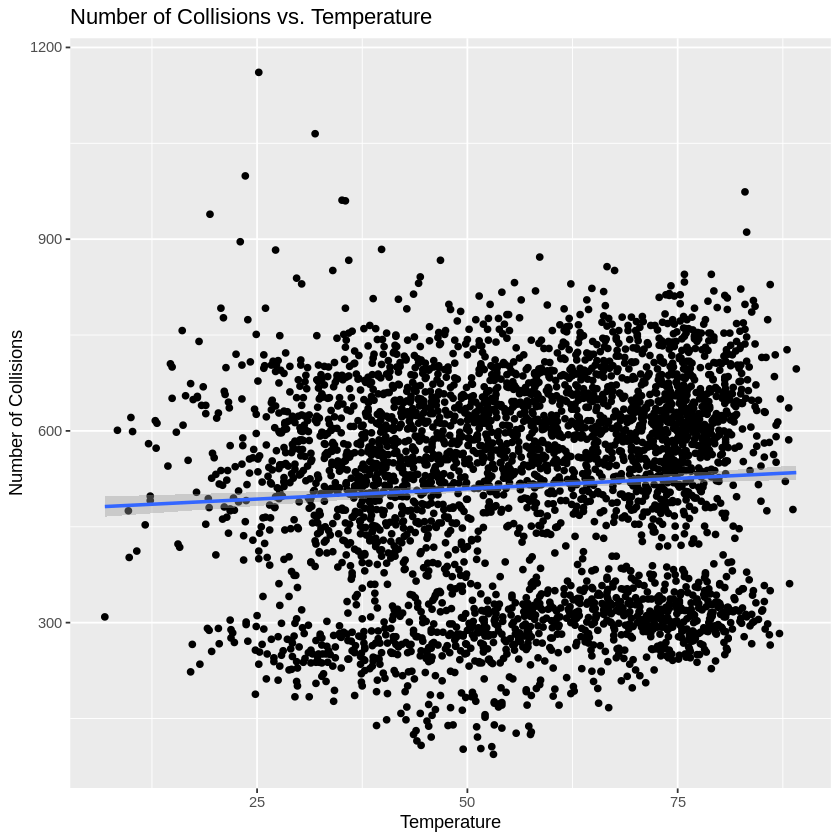

In [162]:
library(ggplot2)
# Example: Plotting Number of Collisions vs. Temperature
ggplot(ccd, aes(x = temp, y = NUM_COLLISIONS)) +
    geom_point() +
    geom_smooth(method = "lm") +
    labs(title = "Number of Collisions vs. Temperature", x = "Temperature", y = "Number of Collisions")


**2.4.2.2 Correlation Analysis**

To perform a correlation analysis between the number of collisions (NUM_COLLISIONS) and each type of weather variable in the dataset, we will follow these steps in R and we will list these correlations in order from highest to lowest.

In [163]:
# Calculate correlations
correlations <- sapply(ccd[, names(ccd) != "NUM_COLLISIONS" & names(ccd) != "collision_date" & names(ccd) != "date"], function(x) {
  cor(x, ccd$NUM_COLLISIONS, use = "complete.obs")
})

# Sort correlations and convert to a dataframe for better readability
sorted_correlations <- sort(correlations, decreasing = TRUE)
correlation_df <- data.frame(Weather_Variable = names(sorted_correlations), Correlation = sorted_correlations)

# Print the sorted correlations
print(correlation_df)


      Weather_Variable Correlation
mo                  mo  0.09278724
temp              temp  0.06798759
dewp              dewp  0.06756641
min                min  0.06368538
max                max  0.06257943
slp                slp  0.03641639
sndp              sndp  0.02420027
prcp              prcp  0.01211670
da                  da -0.01501995
gust              gust -0.03365692
mxpsd            mxpsd -0.04385621
wdsp              wdsp -0.05625117
visib            visib -0.07536722
day                day -0.13314682
fog                fog -0.29512801
year              year -0.57116039


**Explanation:**

**Correlation Calculation:**

The sapply function is used to iterate over each column in ccd, excluding NUM_COLLISIONS, collision_date, and date, to calculate the correlation with NUM_COLLISIONS. The cor function is used for this purpose, with use = "complete.obs" to handle missing values.

**Sorting and Formatting:**

The correlations are sorted in descending order, and then converted into a dataframe for easier reading and interpretation.

**Output:**

The script prints a dataframe showing each weather variable and its correlation with the number of collisions, sorted from the highest to the lowest correlation.

This analysis will help you identify which weather variables have the strongest relationships with the number of collisions, aiding in deciding which variables to include in your regression analysis. Remember, a high correlation does not imply causation, but it can be a good starting point for further investigation.

**Understanding Negative Correlation:**

**Definition:**

A negative correlation means that as one variable increases, the other variable tends to decrease, and vice versa. In your context, if a weather variable has a negative correlation with NUM_COLLISIONS, it implies that higher values of this weather variable are associated with a lower number of collisions.

**Possible Reasons:**

**Weather Conditions Impacting Driving Behavior:**

Certain weather conditions (like higher visibility or lower precipitation) might lead to safer driving conditions, thereby reducing the number of collisions.

**Behavioral Adjustments:**

Drivers might be more cautious or avoid driving under certain weather conditions, leading to fewer collisions.

**Example Interpretations:**

**Visibility (visib):**

If visibility has a negative correlation with NUM_COLLISIONS, this could mean that better visibility (higher visib values) is associated with fewer collisions. This makes intuitive sense as drivers can see more clearly, leading to safer driving conditions.

**Temperature (temp):**

A negative correlation might indicate that higher temperatures, which perhaps lead to clearer roads (less ice and snow), result in fewer collisions.

**Explaining in Your Report:**

**Present the Findings:**

State the observed negative correlations between specific weather variables and the number of collisions.

**Provide Possible Explanations:**

Discuss how these weather conditions might influence driving conditions or driver behavior. Use literature references or logical reasoning based on the nature of the weather variables.

**Caveats:**

Emphasize that correlation does not imply causation. The negative correlation indicates a relationship but does not confirm that one variable causes the other to change.

**Further Investigation:**

Suggest that these correlations warrant further investigation, possibly through more detailed statistical analysis or studies.

**Practical Implications:**

Discuss how these insights could be used by the city's emergency services for planning and optimizing their response.

In summary, negative correlations in your dataset provide valuable insights into how different weather conditions might be associated with the frequency of traffic collisions. Explaining these in your report involves not just stating the facts but also providing context, potential explanations, and the implications of these findings.

**2.4.2.3 Visualization of Weather Correlations with Number of Collisions**

**Scatter Plot with Linear Fit:**

Shows the relationship between NUM_COLLISIONS and a weather variable (e.g., temperature, visibility).
Helps in visualizing the trend and the strength of the relationship.

`geom_smooth()` using formula = 'y ~ x'


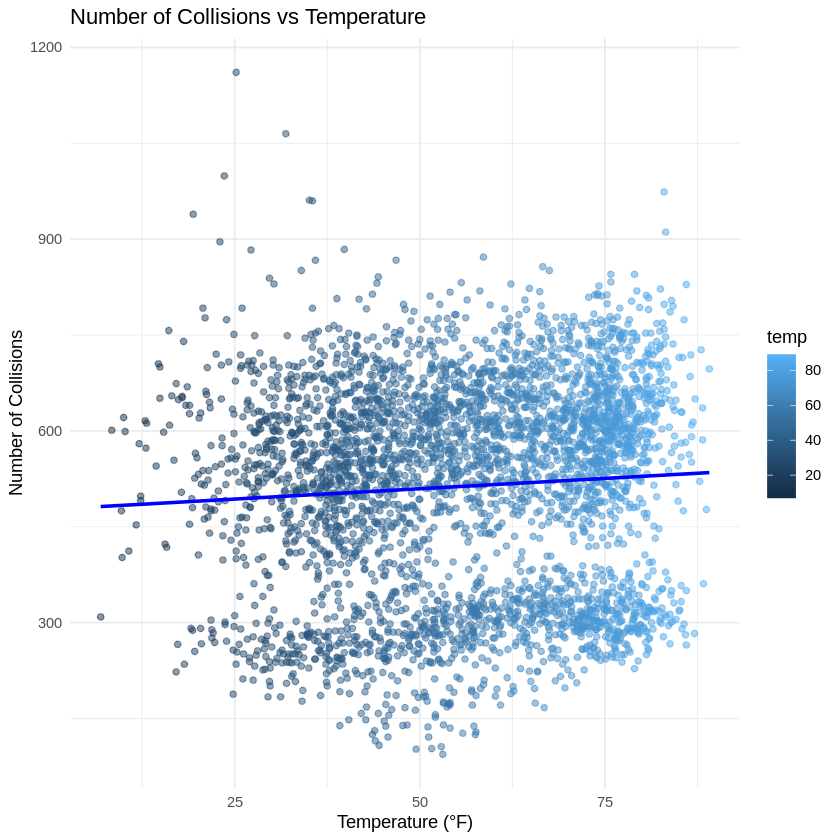

In [164]:
library(ggplot2)

# Scatter plot for NUM_COLLISIONS vs Temperature
ggplot(ccd, aes(x = temp, y = NUM_COLLISIONS)) +
  geom_point(aes(color = temp), alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Number of Collisions vs Temperature",
       x = "Temperature (°F)",
       y = "Number of Collisions") +
  theme_minimal()


**Box Plot:**

Useful for comparing NUM_COLLISIONS across different categories (e.g., foggy days vs. non-foggy days).
Helps in identifying outliers and the distribution of collisions.

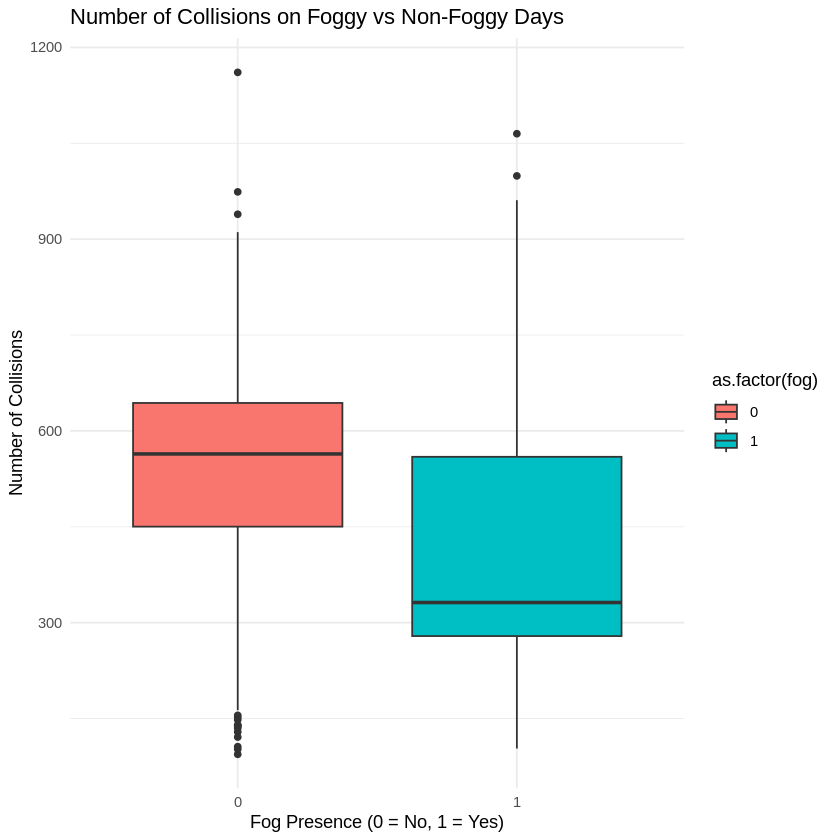

In [165]:
# Box plot for NUM_COLLISIONS on Foggy vs Non-Foggy Days
ggplot(ccd, aes(x = as.factor(fog), y = NUM_COLLISIONS)) +
  geom_boxplot(aes(fill = as.factor(fog))) +
  labs(title = "Number of Collisions on Foggy vs Non-Foggy Days",
       x = "Fog Presence (0 = No, 1 = Yes)",
       y = "Number of Collisions") +
  theme_minimal()


**Correlation Heatmap:**

Visualize the correlation matrix of NUM_COLLISIONS and all weather variables.

Identify which variables have the strongest relationships.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



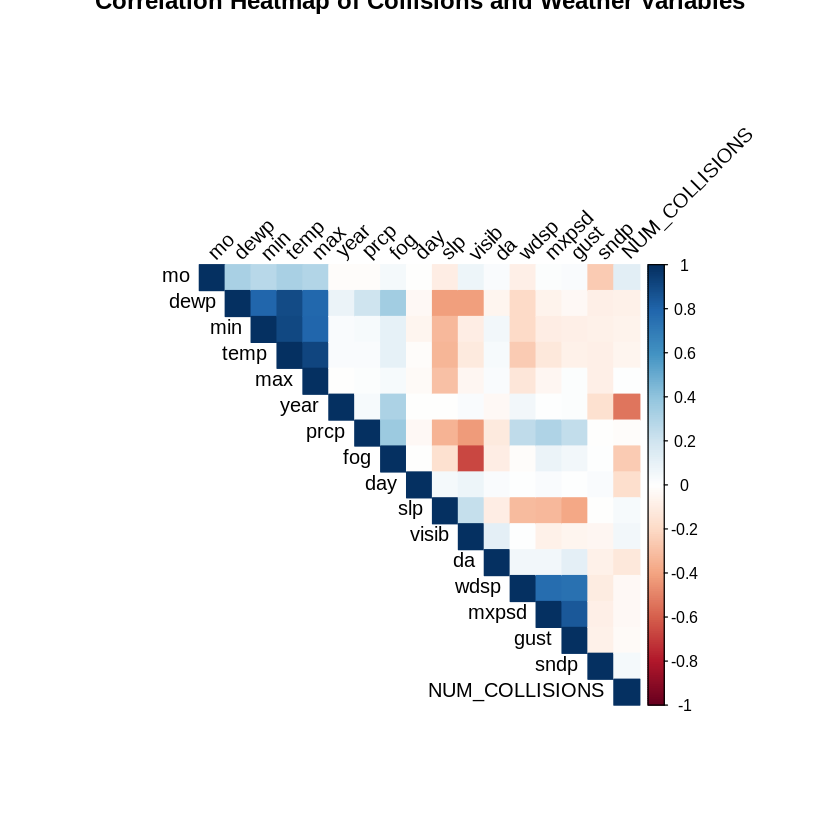

In [166]:
install.packages("corrplot")

library(corrplot)

# Calculate correlation matrix
correlation_matrix <- cor(ccd[, sapply(ccd, is.numeric)], use = "complete.obs")

# Correlation heatmap
corrplot(correlation_matrix, method = "color", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45,
         title = "Correlation Heatmap of Collisions and Weather Variables")


**Color Coding:**

**Darker Blue:** Indicates a stronger negative correlation. This means that as the weather variable increases, the number of collisions tends to decrease.

**Darker Red:** Suggests a stronger positive correlation, where an increase in the weather variable is associated with an increase in collisions.

**White or Lighter Shades:** Represent weaker correlations, either positive or negative.

**Analysis Commentary:**

**Temperature Variables (temp, min, max):**

If these show a strong blue color in relation to NUM_COLLISIONS, it suggests that higher temperatures are associated with fewer collisions. This could be because better weather conditions improve road safety or influence driving behavior.

**Dew Point (dewp):**

A strong correlation with dew point could indicate that humidity levels have a significant effect on collision frequency.

**Precipitation (prcp):**

If there is a strong red color associated with precipitation, it would imply that more rainfall or snow is correlated with an increase in collisions, which could be due to slick roads and reduced visibility.

**Visibility (visib):**

A strong blue here would support the idea that better visibility is associated with fewer collisions, reinforcing the importance of clear weather conditions for road safety.

**Wind Speed (wdsp, mxpsd, gust):**

Strong correlations with wind speed variables might reveal how wind conditions could impact driving safety, either by affecting vehicle control or by bringing debris onto the roads.

**Fog (fog):**

The presence of fog is typically a binary variable (yes/no), and a red association would indicate fog leads to more collisions, potentially due to severely reduced visibility.

**Snow Depth (sndp):**

This would likely show a positive correlation if snow on the ground is associated with more collisions.

**Including in the Report:**

In your report, you should provide a narrative around these findings, including:

**Descriptions of the Strongest Correlations:**

Highlight which weather conditions show the strongest relationships with NUM_COLLISIONS and propose theories as to why these relationships might exist.

**Relevance to Emergency Services:**

Discuss how these correlations could inform emergency service preparations and responses. For example, more staff could be allocated on days with poor visibility or high precipitation.

**Caveat:**

Note that correlation does not equal causation and that other unmeasured factors could influence the number of collisions.

In [167]:
head(ccd)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,NA,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,NA,88.0,66.9,0.00,NA,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,NA,88.0,63.0,0.00,NA,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,NA,91.0,68.0,0.06,NA,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,NA,93.9,70.0,99.99,NA,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,NA,91.0,66.9,0.00,NA,0,638


### **2.4.3 Finding Predictor Variables for Day of the Week**

**2.4.3.1 Check for Seasonality**

We have now looked at the correlation between weather types and number of collisions. We want to now be more specific and find the predictor variables for collisions on days of the week.

For the linear models, a Saturday in August may have less collisions than a Saturday in December. So having different models for particular segments of the year will be better. We can check if this is the case by using data over a number of years and checking for seasonality.

The data for 2012 has only been collected for July onwards, hence the days are numbered from 0 to 184. Every year after that has 365 days except 2016 and 2020 which have 366 and are numbered accordingly below:

In [168]:
# 2012 dataset collision dates
ccd$collision_date[0:184]

[1] 2012-07-01 2012-07-02 2012-07-03 2012-07-04 2012-07-05 2012-07-06
  [7] 2012-07-07 2012-07-08 2012-07-09 2012-07-10 2012-07-11 2012-07-12
 [13] 2012-07-13 2012-07-14 2012-07-15 2012-07-16 2012-07-17 2012-07-18
 [19] 2012-07-19 2012-07-20 2012-07-21 2012-07-22 2012-07-23 2012-07-24
 [25] 2012-07-25 2012-07-26 2012-07-27 2012-07-28 2012-07-29 2012-07-30
 [31] 2012-07-31 2012-08-01 2012-08-02 2012-08-03 2012-08-04 2012-08-05
 [37] 2012-08-06 2012-08-07 2012-08-08 2012-08-09 2012-08-10 2012-08-11
 [43] 2012-08-12 2012-08-13 2012-08-14 2012-08-15 2012-08-16 2012-08-17
 [49] 2012-08-18 2012-08-19 2012-08-20 2012-08-21 2012-08-22 2012-08-23
 [55] 2012-08-24 2012-08-25 2012-08-26 2012-08-27 2012-08-28 2012-08-29
 [61] 2012-08-30 2012-08-31 2012-09-01 2012-09-02 2012-09-03 2012-09-04
 [67] 2012-09-05 2012-09-06 2012-09-07 2012-09-08 2012-09-09 2012-09-10
 [73] 2012-09-11 2012-09-12 2012-09-13 2012-09-14 2012-09-15 2012-09-16
 [79] 2012-09-17 2012-09-18 2012-09-19 2012-09-20 2012-09-21 2012-09-22
 [85] 2012-09-23 2012-09-24 2012-09-25 2012-09-26 2012-09-27 2012-09-28
 [91] 2012-09-29 2012-09-30 2012-10-01 2012-10-02 2012-10-03 2012-10-04
 [97] 2012-10-05 2012-10-06 2012-10-07 2012-10-08 2012-10-09 2012-10-10
[103] 2012-10-11 2012-10-12 2012-10-13 2012-10-14 2012-10-15 2012-10-16
[109] 2012-10-17 2012-10-18 2012-10-19 2012-10-20 2012-10-21 2012-10-22
[115] 2012-10-23 2012-10-24 2012-10-25 2012-10-26 2012-10-27 2012-10-28
[121] 2012-10-29 2012-10-30 2012-10-31 2012-11-01 2012-11-02 2012-11-03
[127] 2012-11-04 2012-11-05 2012-11-06 2012-11-07 2012-11-08 2012-11-09
[133] 2012-11-10 2012-11-11 2012-11-12 2012-11-13 2012-11-14 2012-11-15
[139] 2012-11-16 2012-11-17 2012-11-18 2012-11-19 2012-11-20 2012-11-21
[145] 2012-11-22 2012-11-23 2012-11-24 2012-11-25 2012-11-26 2012-11-27
[151] 2012-11-28 2012-11-29 2012-11-30 2012-12-01 2012-12-02 2012-12-03
[157] 2012-12-04 2012-12-05 2012-12-06 2012-12-07 2012-12-08 2012-12-09
[163] 2012-12-10 2012-12-11 2012-12-12 2012-12-13 2012-12-14 2012-12-15
[169] 2012-12-16 2012-12-17 2012-12-18 2012-12-19 2012-12-20 2012-12-21
[175] 2012-12-22 2012-12-23 2012-12-24 2012-12-25 2012-12-26 2012-12-27
[181] 2012-12-28 2012-12-29 2012-12-30 2012-12-31
3786 Levels: 2012-07-01 2012-07-02 2012-07-03 2012-07-04 ... 2022-11-11

In [169]:
# 2013 dataset collision dates
ccd$collision_date[185:549]

[1] 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06
  [7] 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12
 [13] 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17 2013-01-18
 [19] 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23 2013-01-24
 [25] 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29 2013-01-30
 [31] 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 2013-02-05
 [37] 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11
 [43] 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-17
 [49] 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22 2013-02-23
 [55] 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28 2013-03-01
 [61] 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06 2013-03-07
 [67] 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12 2013-03-13
 [73] 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18 2013-03-19
 [79] 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24 2013-03-25
 [85] 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30 2013-03-31
 [91] 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05 2013-04-06
 [97] 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11 2013-04-12
[103] 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17 2013-04-18
[109] 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23 2013-04-24
[115] 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29 2013-04-30
[121] 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05 2013-05-06
[127] 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11 2013-05-12
[133] 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17 2013-05-18
[139] 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23 2013-05-24
[145] 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29 2013-05-30
[151] 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04 2013-06-05
[157] 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10 2013-06-11
[163] 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16 2013-06-17
[169] 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22 2013-06-23
[175] 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28 2013-06-29
[181] 2013-06-30 2013-07-01 2013-07-02 2013-07-03 2013-07-04 2013-07-05
[187] 2013-07-06 2013-07-07 2013-07-08 2013-07-09 2013-07-10 2013-07-11
[193] 2013-07-12 2013-07-13 2013-07-14 2013-07-15 2013-07-16 2013-07-17
[199] 2013-07-18 2013-07-19 2013-07-20 2013-07-21 2013-07-22 2013-07-23
[205] 2013-07-24 2013-07-25 2013-07-26 2013-07-27 2013-07-28 2013-07-29
[211] 2013-07-30 2013-07-31 2013-08-01 2013-08-02 2013-08-03 2013-08-04
[217] 2013-08-05 2013-08-06 2013-08-07 2013-08-08 2013-08-09 2013-08-10
[223] 2013-08-11 2013-08-12 2013-08-13 2013-08-14 2013-08-15 2013-08-16
[229] 2013-08-17 2013-08-18 2013-08-19 2013-08-20 2013-08-21 2013-08-22
[235] 2013-08-23 2013-08-24 2013-08-25 2013-08-26 2013-08-27 2013-08-28
[241] 2013-08-29 2013-08-30 2013-08-31 2013-09-01 2013-09-02 2013-09-03
[247] 2013-09-04 2013-09-05 2013-09-06 2013-09-07 2013-09-08 2013-09-09
[253] 2013-09-10 2013-09-11 2013-09-12 2013-09-13 2013-09-14 2013-09-15
[259] 2013-09-16 2013-09-17 2013-09-18 2013-09-19 2013-09-20 2013-09-21
[265] 2013-09-22 2013-09-23 2013-09-24 2013-09-25 2013-09-26 2013-09-27
[271] 2013-09-28 2013-09-29 2013-09-30 2013-10-01 2013-10-02 2013-10-03
[277] 2013-10-04 2013-10-05 2013-10-06 2013-10-07 2013-10-08 2013-10-09
[283] 2013-10-10 2013-10-11 2013-10-12 2013-10-13 2013-10-14 2013-10-15
[289] 2013-10-16 2013-10-17 2013-10-18 2013-10-19 2013-10-20 2013-10-21
[295] 2013-10-22 2013-10-23 2013-10-24 2013-10-25 2013-10-26 2013-10-27
[301] 2013-10-28 2013-10-29 2013-10-30 2013-10-31 2013-11-01 2013-11-02
[307] 2013-11-03 2013-11-04 2013-11-05 2013-11-06 2013-11-07 2013-11-08
[313] 2013-11-09 2013-11-10 2013-11-11 2013-11-12 2013-11-13 2013-11-14
[319] 2013-11-15 2013-11-16 2013-11-17 2013-11-18 2013-11-19 2013-11-20
[325] 2013-11-21 2013-11-22 2013-11-23 2013-11-24 2013-11-25 2013-11-26
[331] 2013-11-27 2013-11-28 2013-11-29 201

In [170]:
# 2014 dataset collision dates parameters
ccd$collision_date[550:914]

[1] 2014-01-01 2014-01-02 2014-01-03 2014-01-04 2014-01-05 2014-01-06
  [7] 2014-01-07 2014-01-08 2014-01-09 2014-01-10 2014-01-11 2014-01-12
 [13] 2014-01-13 2014-01-14 2014-01-15 2014-01-16 2014-01-17 2014-01-18
 [19] 2014-01-19 2014-01-20 2014-01-21 2014-01-22 2014-01-23 2014-01-24
 [25] 2014-01-25 2014-01-26 2014-01-27 2014-01-28 2014-01-29 2014-01-30
 [31] 2014-01-31 2014-02-01 2014-02-02 2014-02-03 2014-02-04 2014-02-05
 [37] 2014-02-06 2014-02-07 2014-02-08 2014-02-09 2014-02-10 2014-02-11
 [43] 2014-02-12 2014-02-13 2014-02-14 2014-02-15 2014-02-16 2014-02-17
 [49] 2014-02-18 2014-02-19 2014-02-20 2014-02-21 2014-02-22 2014-02-23
 [55] 2014-02-24 2014-02-25 2014-02-26 2014-02-27 2014-02-28 2014-03-01
 [61] 2014-03-02 2014-03-03 2014-03-04 2014-03-05 2014-03-06 2014-03-07
 [67] 2014-03-08 2014-03-09 2014-03-10 2014-03-11 2014-03-12 2014-03-13
 [73] 2014-03-14 2014-03-15 2014-03-16 2014-03-17 2014-03-18 2014-03-19
 [79] 2014-03-20 2014-03-21 2014-03-22 2014-03-23 2014-03-24 2014-03-25
 [85] 2014-03-26 2014-03-27 2014-03-28 2014-03-29 2014-03-30 2014-03-31
 [91] 2014-04-01 2014-04-02 2014-04-03 2014-04-04 2014-04-05 2014-04-06
 [97] 2014-04-07 2014-04-08 2014-04-09 2014-04-10 2014-04-11 2014-04-12
[103] 2014-04-13 2014-04-14 2014-04-15 2014-04-16 2014-04-17 2014-04-18
[109] 2014-04-19 2014-04-20 2014-04-21 2014-04-22 2014-04-23 2014-04-24
[115] 2014-04-25 2014-04-26 2014-04-27 2014-04-28 2014-04-29 2014-04-30
[121] 2014-05-01 2014-05-02 2014-05-03 2014-05-04 2014-05-05 2014-05-06
[127] 2014-05-07 2014-05-08 2014-05-09 2014-05-10 2014-05-11 2014-05-12
[133] 2014-05-13 2014-05-14 2014-05-15 2014-05-16 2014-05-17 2014-05-18
[139] 2014-05-19 2014-05-20 2014-05-21 2014-05-22 2014-05-23 2014-05-24
[145] 2014-05-25 2014-05-26 2014-05-27 2014-05-28 2014-05-29 2014-05-30
[151] 2014-05-31 2014-06-01 2014-06-02 2014-06-03 2014-06-04 2014-06-05
[157] 2014-06-06 2014-06-07 2014-06-08 2014-06-09 2014-06-10 2014-06-11
[163] 2014-06-12 2014-06-13 2014-06-14 2014-06-15 2014-06-16 2014-06-17
[169] 2014-06-18 2014-06-19 2014-06-20 2014-06-21 2014-06-22 2014-06-23
[175] 2014-06-24 2014-06-25 2014-06-26 2014-06-27 2014-06-28 2014-06-29
[181] 2014-06-30 2014-07-01 2014-07-02 2014-07-03 2014-07-04 2014-07-05
[187] 2014-07-06 2014-07-07 2014-07-08 2014-07-09 2014-07-10 2014-07-11
[193] 2014-07-12 2014-07-13 2014-07-14 2014-07-15 2014-07-16 2014-07-17
[199] 2014-07-18 2014-07-19 2014-07-20 2014-07-21 2014-07-22 2014-07-23
[205] 2014-07-24 2014-07-25 2014-07-26 2014-07-27 2014-07-28 2014-07-29
[211] 2014-07-30 2014-07-31 2014-08-01 2014-08-02 2014-08-03 2014-08-04
[217] 2014-08-05 2014-08-06 2014-08-07 2014-08-08 2014-08-09 2014-08-10
[223] 2014-08-11 2014-08-12 2014-08-13 2014-08-14 2014-08-15 2014-08-16
[229] 2014-08-17 2014-08-18 2014-08-19 2014-08-20 2014-08-21 2014-08-22
[235] 2014-08-23 2014-08-24 2014-08-25 2014-08-26 2014-08-27 2014-08-28
[241] 2014-08-29 2014-08-30 2014-08-31 2014-09-01 2014-09-02 2014-09-03
[247] 2014-09-04 2014-09-05 2014-09-06 2014-09-07 2014-09-08 2014-09-09
[253] 2014-09-10 2014-09-11 2014-09-12 2014-09-13 2014-09-14 2014-09-15
[259] 2014-09-16 2014-09-17 2014-09-18 2014-09-19 2014-09-20 2014-09-21
[265] 2014-09-22 2014-09-23 2014-09-24 2014-09-25 2014-09-26 2014-09-27
[271] 2014-09-28 2014-09-29 2014-09-30 2014-10-01 2014-10-02 2014-10-03
[277] 2014-10-04 2014-10-05 2014-10-06 2014-10-07 2014-10-08 2014-10-09
[283] 2014-10-10 2014-10-11 2014-10-12 2014-10-13 2014-10-14 2014-10-15
[289] 2014-10-16 2014-10-17 2014-10-18 2014-10-19 2014-10-20 2014-10-21
[295] 2014-10-22 2014-10-23 2014-10-24 2014-10-25 2014-10-26 2014-10-27
[301] 2014-10-28 2014-10-29 2014-10-30 2014-10-31 2014-11-01 2014-11-02
[307] 2014-11-03 2014-11-04 2014-11-05 2014-11-06 2014-11-07 2014-11-08
[313] 2014-11-09 2014-11-10 2014-11-11 2014-11-12 2014-11-13 2014-11-14
[319] 2014-11-15 2014-11-16 2014-11-17 2014-11-18 2014-11-19 2014-11-20
[325] 2014-11-21 2014-11-22 2014-11-23 2014-11-24 2014-11-25 2014-11-26
[331] 2014-11-27 2014-11-28 2014-11-29 201

In [171]:
# 2015 dataset collision dates parameters
ccd$collision_date[915:1279]

[1] 2015-01-01 2015-01-02 2015-01-03 2015-01-04 2015-01-05 2015-01-06
  [7] 2015-01-07 2015-01-08 2015-01-09 2015-01-10 2015-01-11 2015-01-12
 [13] 2015-01-13 2015-01-14 2015-01-15 2015-01-16 2015-01-17 2015-01-18
 [19] 2015-01-19 2015-01-20 2015-01-21 2015-01-22 2015-01-23 2015-01-24
 [25] 2015-01-25 2015-01-26 2015-01-27 2015-01-28 2015-01-29 2015-01-30
 [31] 2015-01-31 2015-02-01 2015-02-02 2015-02-03 2015-02-04 2015-02-05
 [37] 2015-02-06 2015-02-07 2015-02-08 2015-02-09 2015-02-10 2015-02-11
 [43] 2015-02-12 2015-02-13 2015-02-14 2015-02-15 2015-02-16 2015-02-17
 [49] 2015-02-18 2015-02-19 2015-02-20 2015-02-21 2015-02-22 2015-02-23
 [55] 2015-02-24 2015-02-25 2015-02-26 2015-02-27 2015-02-28 2015-03-01
 [61] 2015-03-02 2015-03-03 2015-03-04 2015-03-05 2015-03-06 2015-03-07
 [67] 2015-03-08 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13
 [73] 2015-03-14 2015-03-15 2015-03-16 2015-03-17 2015-03-18 2015-03-19
 [79] 2015-03-20 2015-03-21 2015-03-22 2015-03-23 2015-03-24 2015-03-25
 [85] 2015-03-26 2015-03-27 2015-03-28 2015-03-29 2015-03-30 2015-03-31
 [91] 2015-04-01 2015-04-02 2015-04-03 2015-04-04 2015-04-05 2015-04-06
 [97] 2015-04-07 2015-04-08 2015-04-09 2015-04-10 2015-04-11 2015-04-12
[103] 2015-04-13 2015-04-14 2015-04-15 2015-04-16 2015-04-17 2015-04-18
[109] 2015-04-19 2015-04-20 2015-04-21 2015-04-22 2015-04-23 2015-04-24
[115] 2015-04-25 2015-04-26 2015-04-27 2015-04-28 2015-04-29 2015-04-30
[121] 2015-05-01 2015-05-02 2015-05-03 2015-05-04 2015-05-05 2015-05-06
[127] 2015-05-07 2015-05-08 2015-05-09 2015-05-10 2015-05-11 2015-05-12
[133] 2015-05-13 2015-05-14 2015-05-15 2015-05-16 2015-05-17 2015-05-18
[139] 2015-05-19 2015-05-20 2015-05-21 2015-05-22 2015-05-23 2015-05-24
[145] 2015-05-25 2015-05-26 2015-05-27 2015-05-28 2015-05-29 2015-05-30
[151] 2015-05-31 2015-06-01 2015-06-02 2015-06-03 2015-06-04 2015-06-05
[157] 2015-06-06 2015-06-07 2015-06-08 2015-06-09 2015-06-10 2015-06-11
[163] 2015-06-12 2015-06-13 2015-06-14 2015-06-15 2015-06-16 2015-06-17
[169] 2015-06-18 2015-06-19 2015-06-20 2015-06-21 2015-06-22 2015-06-23
[175] 2015-06-24 2015-06-25 2015-06-26 2015-06-27 2015-06-28 2015-06-29
[181] 2015-06-30 2015-07-01 2015-07-02 2015-07-03 2015-07-04 2015-07-05
[187] 2015-07-06 2015-07-07 2015-07-08 2015-07-09 2015-07-10 2015-07-11
[193] 2015-07-12 2015-07-13 2015-07-14 2015-07-15 2015-07-16 2015-07-17
[199] 2015-07-18 2015-07-19 2015-07-20 2015-07-21 2015-07-22 2015-07-23
[205] 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29
[211] 2015-07-30 2015-07-31 2015-08-01 2015-08-02 2015-08-03 2015-08-04
[217] 2015-08-05 2015-08-06 2015-08-07 2015-08-08 2015-08-09 2015-08-10
[223] 2015-08-11 2015-08-12 2015-08-13 2015-08-14 2015-08-15 2015-08-16
[229] 2015-08-17 2015-08-18 2015-08-19 2015-08-20 2015-08-21 2015-08-22
[235] 2015-08-23 2015-08-24 2015-08-25 2015-08-26 2015-08-27 2015-08-28
[241] 2015-08-29 2015-08-30 2015-08-31 2015-09-01 2015-09-02 2015-09-03
[247] 2015-09-04 2015-09-05 2015-09-06 2015-09-07 2015-09-08 2015-09-09
[253] 2015-09-10 2015-09-11 2015-09-12 2015-09-13 2015-09-14 2015-09-15
[259] 2015-09-16 2015-09-17 2015-09-18 2015-09-19 2015-09-20 2015-09-21
[265] 2015-09-22 2015-09-23 2015-09-24 2015-09-25 2015-09-26 2015-09-27
[271] 2015-09-28 2015-09-29 2015-09-30 2015-10-01 2015-10-02 2015-10-03
[277] 2015-10-04 2015-10-05 2015-10-06 2015-10-07 2015-10-08 2015-10-09
[283] 2015-10-10 2015-10-11 2015-10-12 2015-10-13 2015-10-14 2015-10-15
[289] 2015-10-16 2015-10-17 2015-10-18 2015-10-19 2015-10-20 2015-10-21
[295] 2015-10-22 2015-10-23 2015-10-24 2015-10-25 2015-10-26 2015-10-27
[301] 2015-10-28 2015-10-29 2015-10-30 2015-10-31 2015-11-01 2015-11-02
[307] 2015-11-03 2015-11-04 2015-11-05 2015-11-06 2015-11-07 2015-11-08
[313] 2015-11-09 2015-11-10 2015-11-11 2015-11-12 2015-11-13 2015-11-14
[319] 2015-11-15 2015-11-16 2015-11-17 2015-11-18 2015-11-19 2015-11-20
[325] 2015-11-21 2015-11-22 2015-11-23 2015-11-24 2015-11-25 2015-11-26
[331] 2015-11-27 2015-11-28 2015-11-29 201

In [172]:
# 2016 dataset collision dates parameters
ccd$collision_date[1280:1645]

[1] 2016-01-01 2016-01-02 2016-01-03 2016-01-04 2016-01-05 2016-01-06
  [7] 2016-01-07 2016-01-08 2016-01-09 2016-01-10 2016-01-11 2016-01-12
 [13] 2016-01-13 2016-01-14 2016-01-15 2016-01-16 2016-01-17 2016-01-18
 [19] 2016-01-19 2016-01-20 2016-01-21 2016-01-22 2016-01-23 2016-01-24
 [25] 2016-01-25 2016-01-26 2016-01-27 2016-01-28 2016-01-29 2016-01-30
 [31] 2016-01-31 2016-02-01 2016-02-02 2016-02-03 2016-02-04 2016-02-05
 [37] 2016-02-06 2016-02-07 2016-02-08 2016-02-09 2016-02-10 2016-02-11
 [43] 2016-02-12 2016-02-13 2016-02-14 2016-02-15 2016-02-16 2016-02-17
 [49] 2016-02-18 2016-02-19 2016-02-20 2016-02-21 2016-02-22 2016-02-23
 [55] 2016-02-24 2016-02-25 2016-02-26 2016-02-27 2016-02-28 2016-02-29
 [61] 2016-03-01 2016-03-02 2016-03-03 2016-03-04 2016-03-05 2016-03-06
 [67] 2016-03-07 2016-03-08 2016-03-09 2016-03-10 2016-03-11 2016-03-12
 [73] 2016-03-13 2016-03-14 2016-03-15 2016-03-16 2016-03-17 2016-03-18
 [79] 2016-03-19 2016-03-20 2016-03-21 2016-03-22 2016-03-23 2016-03-24
 [85] 2016-03-25 2016-03-26 2016-03-27 2016-03-28 2016-03-29 2016-03-30
 [91] 2016-03-31 2016-04-01 2016-04-02 2016-04-03 2016-04-04 2016-04-05
 [97] 2016-04-06 2016-04-07 2016-04-08 2016-04-09 2016-04-10 2016-04-11
[103] 2016-04-12 2016-04-13 2016-04-14 2016-04-15 2016-04-16 2016-04-17
[109] 2016-04-18 2016-04-19 2016-04-20 2016-04-21 2016-04-22 2016-04-23
[115] 2016-04-24 2016-04-25 2016-04-26 2016-04-27 2016-04-28 2016-04-29
[121] 2016-04-30 2016-05-01 2016-05-02 2016-05-03 2016-05-04 2016-05-05
[127] 2016-05-06 2016-05-07 2016-05-08 2016-05-09 2016-05-10 2016-05-11
[133] 2016-05-12 2016-05-13 2016-05-14 2016-05-15 2016-05-16 2016-05-17
[139] 2016-05-18 2016-05-19 2016-05-20 2016-05-21 2016-05-22 2016-05-23
[145] 2016-05-24 2016-05-25 2016-05-26 2016-05-27 2016-05-28 2016-05-29
[151] 2016-05-30 2016-05-31 2016-06-01 2016-06-02 2016-06-03 2016-06-04
[157] 2016-06-05 2016-06-06 2016-06-07 2016-06-08 2016-06-09 2016-06-10
[163] 2016-06-11 2016-06-12 2016-06-13 2016-06-14 2016-06-15 2016-06-16
[169] 2016-06-17 2016-06-18 2016-06-19 2016-06-20 2016-06-21 2016-06-22
[175] 2016-06-23 2016-06-24 2016-06-25 2016-06-26 2016-06-27 2016-06-28
[181] 2016-06-29 2016-06-30 2016-07-01 2016-07-02 2016-07-03 2016-07-04
[187] 2016-07-05 2016-07-06 2016-07-07 2016-07-08 2016-07-09 2016-07-10
[193] 2016-07-11 2016-07-12 2016-07-13 2016-07-14 2016-07-15 2016-07-16
[199] 2016-07-17 2016-07-18 2016-07-19 2016-07-20 2016-07-21 2016-07-22
[205] 2016-07-23 2016-07-24 2016-07-25 2016-07-26 2016-07-27 2016-07-28
[211] 2016-07-29 2016-07-30 2016-07-31 2016-08-01 2016-08-02 2016-08-03
[217] 2016-08-04 2016-08-05 2016-08-06 2016-08-07 2016-08-08 2016-08-09
[223] 2016-08-10 2016-08-11 2016-08-12 2016-08-13 2016-08-14 2016-08-15
[229] 2016-08-16 2016-08-17 2016-08-18 2016-08-19 2016-08-20 2016-08-21
[235] 2016-08-22 2016-08-23 2016-08-24 2016-08-25 2016-08-26 2016-08-27
[241] 2016-08-28 2016-08-29 2016-08-30 2016-08-31 2016-09-01 2016-09-02
[247] 2016-09-03 2016-09-04 2016-09-05 2016-09-06 2016-09-07 2016-09-08
[253] 2016-09-09 2016-09-10 2016-09-11 2016-09-12 2016-09-13 2016-09-14
[259] 2016-09-15 2016-09-16 2016-09-17 2016-09-18 2016-09-19 2016-09-20
[265] 2016-09-21 2016-09-22 2016-09-23 2016-09-24 2016-09-25 2016-09-26
[271] 2016-09-27 2016-09-28 2016-09-29 2016-09-30 2016-10-01 2016-10-02
[277] 2016-10-03 2016-10-04 2016-10-05 2016-10-06 2016-10-07 2016-10-08
[283] 2016-10-09 2016-10-10 2016-10-11 2016-10-12 2016-10-13 2016-10-14
[289] 2016-10-15 2016-10-16 2016-10-17 2016-10-18 2016-10-19 2016-10-20
[295] 2016-10-21 2016-10-22 2016-10-23 2016-10-24 2016-10-25 2016-10-26
[301] 2016-10-27 2016-10-28 2016-10-29 2016-10-30 2016-10-31 2016-11-01
[307] 2016-11-02 2016-11-03 2016-11-04 2016-11-05 2016-11-06 2016-11-07
[313] 2016-11-08 2016-11-09 2016-11-10 2016-11-11 2016-11-12 2016-11-13
[319] 2016-11-14 2016-11-15 2016-11-16 2016-11-17 2016-11-18 2016-11-19
[325] 2016-11-20 2016-11-21 2016-11-22 2016-11-23 2016-11-24 2016-11-25
[331] 2016-11-26 2016-11-27 2016-11-28 201

In [173]:
# 2017 dataset collision dates parameters
ccd$collision_date[1646:2011]

[1] 2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05 2017-01-06
  [7] 2017-01-07 2017-01-08 2017-01-09 2017-01-10 2017-01-11 2017-01-12
 [13] 2017-01-13 2017-01-14 2017-01-15 2017-01-16 2017-01-17 2017-01-18
 [19] 2017-01-19 2017-01-20 2017-01-21 2017-01-22 2017-01-23 2017-01-24
 [25] 2017-01-25 2017-01-26 2017-01-27 2017-01-28 2017-01-29 2017-01-30
 [31] 2017-01-31 2017-02-01 2017-02-02 2017-02-03 2017-02-04 2017-02-05
 [37] 2017-02-06 2017-02-07 2017-02-08 2017-02-09 2017-02-10 2017-02-11
 [43] 2017-02-12 2017-02-13 2017-02-14 2017-02-15 2017-02-16 2017-02-17
 [49] 2017-02-18 2017-02-19 2017-02-20 2017-02-21 2017-02-22 2017-02-23
 [55] 2017-02-24 2017-02-25 2017-02-26 2017-02-27 2017-02-28 2017-03-01
 [61] 2017-03-02 2017-03-03 2017-03-04 2017-03-05 2017-03-06 2017-03-07
 [67] 2017-03-08 2017-03-09 2017-03-10 2017-03-11 2017-03-12 2017-03-13
 [73] 2017-03-14 2017-03-15 2017-03-16 2017-03-17 2017-03-18 2017-03-19
 [79] 2017-03-20 2017-03-21 2017-03-22 2017-03-23 2017-03-24 2017-03-25
 [85] 2017-03-26 2017-03-27 2017-03-28 2017-03-29 2017-03-30 2017-03-31
 [91] 2017-04-01 2017-04-02 2017-04-03 2017-04-04 2017-04-05 2017-04-06
 [97] 2017-04-07 2017-04-08 2017-04-09 2017-04-10 2017-04-11 2017-04-12
[103] 2017-04-13 2017-04-14 2017-04-15 2017-04-16 2017-04-17 2017-04-18
[109] 2017-04-19 2017-04-20 2017-04-21 2017-04-22 2017-04-23 2017-04-24
[115] 2017-04-25 2017-04-26 2017-04-27 2017-04-28 2017-04-29 2017-04-30
[121] 2017-05-01 2017-05-02 2017-05-03 2017-05-04 2017-05-05 2017-05-06
[127] 2017-05-07 2017-05-08 2017-05-09 2017-05-10 2017-05-11 2017-05-12
[133] 2017-05-13 2017-05-14 2017-05-15 2017-05-16 2017-05-17 2017-05-18
[139] 2017-05-19 2017-05-20 2017-05-21 2017-05-22 2017-05-23 2017-05-24
[145] 2017-05-25 2017-05-26 2017-05-27 2017-05-28 2017-05-29 2017-05-30
[151] 2017-05-31 2017-06-01 2017-06-02 2017-06-03 2017-06-04 2017-06-05
[157] 2017-06-06 2017-06-07 2017-06-08 2017-06-09 2017-06-10 2017-06-11
[163] 2017-06-12 2017-06-13 2017-06-14 2017-06-15 2017-06-16 2017-06-17
[169] 2017-06-18 2017-06-19 2017-06-20 2017-06-21 2017-06-22 2017-06-23
[175] 2017-06-24 2017-06-25 2017-06-26 2017-06-27 2017-06-28 2017-06-29
[181] 2017-06-30 2017-07-01 2017-07-02 2017-07-03 2017-07-04 2017-07-05
[187] 2017-07-06 2017-07-07 2017-07-08 2017-07-09 2017-07-10 2017-07-11
[193] 2017-07-12 2017-07-13 2017-07-14 2017-07-15 2017-07-16 2017-07-17
[199] 2017-07-18 2017-07-19 2017-07-20 2017-07-21 2017-07-22 2017-07-23
[205] 2017-07-24 2017-07-25 2017-07-26 2017-07-27 2017-07-28 2017-07-29
[211] 2017-07-30 2017-07-31 2017-08-01 2017-08-02 2017-08-03 2017-08-04
[217] 2017-08-05 2017-08-06 2017-08-07 2017-08-08 2017-08-09 2017-08-10
[223] 2017-08-11 2017-08-12 2017-08-13 2017-08-14 2017-08-15 2017-08-16
[229] 2017-08-17 2017-08-18 2017-08-19 2017-08-20 2017-08-21 2017-08-22
[235] 2017-08-23 2017-08-24 2017-08-25 2017-08-26 2017-08-27 2017-08-28
[241] 2017-08-29 2017-08-30 2017-08-31 2017-09-01 2017-09-02 2017-09-03
[247] 2017-09-04 2017-09-05 2017-09-06 2017-09-07 2017-09-08 2017-09-09
[253] 2017-09-10 2017-09-11 2017-09-12 2017-09-13 2017-09-14 2017-09-15
[259] 2017-09-16 2017-09-17 2017-09-18 2017-09-19 2017-09-20 2017-09-21
[265] 2017-09-22 2017-09-23 2017-09-24 2017-09-25 2017-09-26 2017-09-27
[271] 2017-09-28 2017-09-29 2017-09-30 2017-10-01 2017-10-02 2017-10-03
[277] 2017-10-04 2017-10-05 2017-10-06 2017-10-07 2017-10-08 2017-10-09
[283] 2017-10-10 2017-10-11 2017-10-12 2017-10-13 2017-10-14 2017-10-15
[289] 2017-10-16 2017-10-17 2017-10-18 2017-10-19 2017-10-20 2017-10-21
[295] 2017-10-22 2017-10-23 2017-10-24 2017-10-25 2017-10-26 2017-10-27
[301] 2017-10-28 2017-10-29 2017-10-30 2017-10-31 2017-11-01 2017-11-02
[307] 2017-11-03 2017-11-04 2017-11-05 2017-11-06 2017-11-07 2017-11-08
[313] 2017-11-09 2017-11-10 2017-11-11 2017-11-12 2017-11-13 2017-11-14
[319] 2017-11-15 2017-11-16 2017-11-17 2017-11-18 2017-11-19 2017-11-20
[325] 2017-11-21 2017-11-22 2017-11-23 2017-11-24 2017-11-25 2017-11-26
[331] 2017-11-27 2017-11-28 2017-11-29 201

In [174]:
# 2018 dataset collision dates parameters
ccd$collision_date[2012:2375]

[1] 2018-01-02 2018-01-03 2018-01-04 2018-01-05 2018-01-06 2018-01-07
  [7] 2018-01-08 2018-01-09 2018-01-10 2018-01-11 2018-01-12 2018-01-13
 [13] 2018-01-14 2018-01-15 2018-01-16 2018-01-17 2018-01-18 2018-01-19
 [19] 2018-01-20 2018-01-21 2018-01-22 2018-01-23 2018-01-24 2018-01-25
 [25] 2018-01-26 2018-01-27 2018-01-28 2018-01-29 2018-01-30 2018-01-31
 [31] 2018-02-01 2018-02-02 2018-02-03 2018-02-04 2018-02-05 2018-02-06
 [37] 2018-02-07 2018-02-08 2018-02-09 2018-02-10 2018-02-11 2018-02-12
 [43] 2018-02-13 2018-02-14 2018-02-15 2018-02-16 2018-02-17 2018-02-18
 [49] 2018-02-19 2018-02-20 2018-02-21 2018-02-22 2018-02-23 2018-02-24
 [55] 2018-02-25 2018-02-26 2018-02-27 2018-02-28 2018-03-01 2018-03-02
 [61] 2018-03-03 2018-03-04 2018-03-05 2018-03-06 2018-03-07 2018-03-08
 [67] 2018-03-09 2018-03-10 2018-03-11 2018-03-12 2018-03-13 2018-03-14
 [73] 2018-03-15 2018-03-16 2018-03-17 2018-03-18 2018-03-19 2018-03-20
 [79] 2018-03-21 2018-03-22 2018-03-23 2018-03-24 2018-03-25 2018-03-26
 [85] 2018-03-27 2018-03-28 2018-03-29 2018-03-30 2018-03-31 2018-04-01
 [91] 2018-04-02 2018-04-03 2018-04-04 2018-04-05 2018-04-06 2018-04-07
 [97] 2018-04-08 2018-04-09 2018-04-10 2018-04-11 2018-04-12 2018-04-13
[103] 2018-04-14 2018-04-15 2018-04-16 2018-04-17 2018-04-18 2018-04-19
[109] 2018-04-20 2018-04-21 2018-04-22 2018-04-23 2018-04-24 2018-04-25
[115] 2018-04-26 2018-04-27 2018-04-28 2018-04-29 2018-04-30 2018-05-01
[121] 2018-05-02 2018-05-03 2018-05-04 2018-05-05 2018-05-06 2018-05-07
[127] 2018-05-08 2018-05-09 2018-05-10 2018-05-11 2018-05-12 2018-05-13
[133] 2018-05-14 2018-05-15 2018-05-16 2018-05-17 2018-05-18 2018-05-19
[139] 2018-05-20 2018-05-21 2018-05-22 2018-05-23 2018-05-24 2018-05-25
[145] 2018-05-26 2018-05-27 2018-05-28 2018-05-29 2018-05-30 2018-05-31
[151] 2018-06-01 2018-06-02 2018-06-03 2018-06-04 2018-06-05 2018-06-06
[157] 2018-06-07 2018-06-08 2018-06-09 2018-06-10 2018-06-11 2018-06-12
[163] 2018-06-13 2018-06-14 2018-06-15 2018-06-16 2018-06-17 2018-06-18
[169] 2018-06-19 2018-06-20 2018-06-21 2018-06-22 2018-06-23 2018-06-24
[175] 2018-06-25 2018-06-26 2018-06-27 2018-06-28 2018-06-29 2018-06-30
[181] 2018-07-01 2018-07-02 2018-07-03 2018-07-04 2018-07-05 2018-07-06
[187] 2018-07-07 2018-07-08 2018-07-09 2018-07-10 2018-07-11 2018-07-12
[193] 2018-07-13 2018-07-14 2018-07-15 2018-07-16 2018-07-17 2018-07-18
[199] 2018-07-19 2018-07-20 2018-07-21 2018-07-22 2018-07-23 2018-07-24
[205] 2018-07-25 2018-07-26 2018-07-27 2018-07-28 2018-07-29 2018-07-30
[211] 2018-07-31 2018-08-01 2018-08-02 2018-08-03 2018-08-04 2018-08-05
[217] 2018-08-06 2018-08-07 2018-08-08 2018-08-09 2018-08-10 2018-08-11
[223] 2018-08-12 2018-08-13 2018-08-14 2018-08-15 2018-08-16 2018-08-17
[229] 2018-08-18 2018-08-19 2018-08-20 2018-08-21 2018-08-22 2018-08-23
[235] 2018-08-24 2018-08-25 2018-08-26 2018-08-27 2018-08-28 2018-08-29
[241] 2018-08-30 2018-08-31 2018-09-01 2018-09-02 2018-09-03 2018-09-04
[247] 2018-09-05 2018-09-06 2018-09-07 2018-09-08 2018-09-09 2018-09-10
[253] 2018-09-11 2018-09-12 2018-09-13 2018-09-14 2018-09-15 2018-09-16
[259] 2018-09-17 2018-09-18 2018-09-19 2018-09-20 2018-09-21 2018-09-22
[265] 2018-09-23 2018-09-24 2018-09-25 2018-09-26 2018-09-27 2018-09-28
[271] 2018-09-29 2018-09-30 2018-10-01 2018-10-02 2018-10-03 2018-10-04
[277] 2018-10-05 2018-10-06 2018-10-07 2018-10-08 2018-10-09 2018-10-10
[283] 2018-10-11 2018-10-12 2018-10-13 2018-10-14 2018-10-15 2018-10-16
[289] 2018-10-17 2018-10-18 2018-10-19 2018-10-20 2018-10-21 2018-10-22
[295] 2018-10-23 2018-10-24 2018-10-25 2018-10-26 2018-10-27 2018-10-28
[301] 2018-10-29 2018-10-30 2018-10-31 2018-11-01 2018-11-02 2018-11-03
[307] 2018-11-04 2018-11-05 2018-11-06 2018-11-07 2018-11-08 2018-11-09
[313] 2018-11-10 2018-11-11 2018-11-12 2018-11-13 2018-11-14 2018-11-15
[319] 2018-11-16 2018-11-17 2018-11-18 2018-11-19 2018-11-20 2018-11-21
[325] 2018-11-22 2018-11-23 2018-11-24 2018-11-25 2018-11-26 2018-11-27
[331] 2018-11-28 2018-11-29 2018-11-30 201

In [175]:
# 2019 dataset collision dates parameters
ccd$collision_date[2376:2740]

[1] 2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05 2019-01-06
  [7] 2019-01-07 2019-01-08 2019-01-09 2019-01-10 2019-01-11 2019-01-12
 [13] 2019-01-13 2019-01-14 2019-01-15 2019-01-16 2019-01-17 2019-01-18
 [19] 2019-01-19 2019-01-20 2019-01-21 2019-01-22 2019-01-23 2019-01-24
 [25] 2019-01-25 2019-01-26 2019-01-27 2019-01-28 2019-01-29 2019-01-30
 [31] 2019-01-31 2019-02-01 2019-02-02 2019-02-03 2019-02-04 2019-02-05
 [37] 2019-02-06 2019-02-07 2019-02-08 2019-02-09 2019-02-10 2019-02-11
 [43] 2019-02-12 2019-02-13 2019-02-14 2019-02-15 2019-02-16 2019-02-17
 [49] 2019-02-18 2019-02-19 2019-02-20 2019-02-21 2019-02-22 2019-02-23
 [55] 2019-02-24 2019-02-25 2019-02-26 2019-02-27 2019-02-28 2019-03-01
 [61] 2019-03-02 2019-03-03 2019-03-04 2019-03-05 2019-03-06 2019-03-07
 [67] 2019-03-08 2019-03-09 2019-03-10 2019-03-11 2019-03-12 2019-03-13
 [73] 2019-03-14 2019-03-15 2019-03-16 2019-03-17 2019-03-18 2019-03-19
 [79] 2019-03-20 2019-03-21 2019-03-22 2019-03-23 2019-03-24 2019-03-25
 [85] 2019-03-26 2019-03-27 2019-03-28 2019-03-29 2019-03-30 2019-03-31
 [91] 2019-04-01 2019-04-02 2019-04-03 2019-04-04 2019-04-05 2019-04-06
 [97] 2019-04-07 2019-04-08 2019-04-09 2019-04-10 2019-04-11 2019-04-12
[103] 2019-04-13 2019-04-14 2019-04-15 2019-04-16 2019-04-17 2019-04-18
[109] 2019-04-19 2019-04-20 2019-04-21 2019-04-22 2019-04-23 2019-04-24
[115] 2019-04-25 2019-04-26 2019-04-27 2019-04-28 2019-04-29 2019-04-30
[121] 2019-05-01 2019-05-02 2019-05-03 2019-05-04 2019-05-05 2019-05-06
[127] 2019-05-07 2019-05-08 2019-05-09 2019-05-10 2019-05-11 2019-05-12
[133] 2019-05-13 2019-05-14 2019-05-15 2019-05-16 2019-05-17 2019-05-18
[139] 2019-05-19 2019-05-20 2019-05-21 2019-05-22 2019-05-23 2019-05-24
[145] 2019-05-25 2019-05-26 2019-05-27 2019-05-28 2019-05-29 2019-05-30
[151] 2019-05-31 2019-06-01 2019-06-02 2019-06-03 2019-06-04 2019-06-05
[157] 2019-06-06 2019-06-07 2019-06-08 2019-06-09 2019-06-10 2019-06-11
[163] 2019-06-12 2019-06-13 2019-06-14 2019-06-15 2019-06-16 2019-06-17
[169] 2019-06-18 2019-06-19 2019-06-20 2019-06-21 2019-06-22 2019-06-23
[175] 2019-06-24 2019-06-25 2019-06-26 2019-06-27 2019-06-28 2019-06-29
[181] 2019-06-30 2019-07-01 2019-07-02 2019-07-03 2019-07-04 2019-07-05
[187] 2019-07-06 2019-07-07 2019-07-08 2019-07-09 2019-07-10 2019-07-11
[193] 2019-07-12 2019-07-13 2019-07-14 2019-07-15 2019-07-16 2019-07-17
[199] 2019-07-18 2019-07-19 2019-07-20 2019-07-21 2019-07-22 2019-07-23
[205] 2019-07-24 2019-07-25 2019-07-26 2019-07-27 2019-07-28 2019-07-29
[211] 2019-07-30 2019-07-31 2019-08-01 2019-08-02 2019-08-03 2019-08-04
[217] 2019-08-05 2019-08-06 2019-08-07 2019-08-08 2019-08-09 2019-08-10
[223] 2019-08-11 2019-08-12 2019-08-13 2019-08-14 2019-08-15 2019-08-16
[229] 2019-08-17 2019-08-18 2019-08-19 2019-08-20 2019-08-21 2019-08-22
[235] 2019-08-23 2019-08-24 2019-08-25 2019-08-26 2019-08-27 2019-08-28
[241] 2019-08-29 2019-08-30 2019-08-31 2019-09-01 2019-09-02 2019-09-03
[247] 2019-09-04 2019-09-05 2019-09-06 2019-09-07 2019-09-08 2019-09-09
[253] 2019-09-10 2019-09-11 2019-09-12 2019-09-13 2019-09-14 2019-09-15
[259] 2019-09-16 2019-09-17 2019-09-18 2019-09-19 2019-09-20 2019-09-21
[265] 2019-09-22 2019-09-23 2019-09-24 2019-09-25 2019-09-26 2019-09-27
[271] 2019-09-28 2019-09-29 2019-09-30 2019-10-01 2019-10-02 2019-10-03
[277] 2019-10-04 2019-10-05 2019-10-06 2019-10-07 2019-10-08 2019-10-09
[283] 2019-10-10 2019-10-11 2019-10-12 2019-10-13 2019-10-14 2019-10-15
[289] 2019-10-16 2019-10-17 2019-10-18 2019-10-19 2019-10-20 2019-10-21
[295] 2019-10-22 2019-10-23 2019-10-24 2019-10-25 2019-10-26 2019-10-27
[301] 2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02
[307] 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08
[313] 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14
[319] 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20
[325] 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26
[331] 2019-11-27 2019-11-28 2019-11-29 201

In [176]:
# 2020 dataset collision dates parameters
ccd$collision_date[2741:3106]

[1] 2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05 2020-01-06
  [7] 2020-01-07 2020-01-08 2020-01-09 2020-01-10 2020-01-11 2020-01-12
 [13] 2020-01-13 2020-01-14 2020-01-15 2020-01-16 2020-01-17 2020-01-18
 [19] 2020-01-19 2020-01-20 2020-01-21 2020-01-22 2020-01-23 2020-01-24
 [25] 2020-01-25 2020-01-26 2020-01-27 2020-01-28 2020-01-29 2020-01-30
 [31] 2020-01-31 2020-02-01 2020-02-02 2020-02-03 2020-02-04 2020-02-05
 [37] 2020-02-06 2020-02-07 2020-02-08 2020-02-09 2020-02-10 2020-02-11
 [43] 2020-02-12 2020-02-13 2020-02-14 2020-02-15 2020-02-16 2020-02-17
 [49] 2020-02-18 2020-02-19 2020-02-20 2020-02-21 2020-02-22 2020-02-23
 [55] 2020-02-24 2020-02-25 2020-02-26 2020-02-27 2020-02-28 2020-02-29
 [61] 2020-03-01 2020-03-02 2020-03-03 2020-03-04 2020-03-05 2020-03-06
 [67] 2020-03-07 2020-03-08 2020-03-09 2020-03-10 2020-03-11 2020-03-12
 [73] 2020-03-13 2020-03-14 2020-03-15 2020-03-16 2020-03-17 2020-03-18
 [79] 2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23 2020-03-24
 [85] 2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29 2020-03-30
 [91] 2020-03-31 2020-04-01 2020-04-02 2020-04-03 2020-04-04 2020-04-05
 [97] 2020-04-06 2020-04-07 2020-04-08 2020-04-09 2020-04-10 2020-04-11
[103] 2020-04-12 2020-04-13 2020-04-14 2020-04-15 2020-04-16 2020-04-17
[109] 2020-04-18 2020-04-19 2020-04-20 2020-04-21 2020-04-22 2020-04-23
[115] 2020-04-24 2020-04-25 2020-04-26 2020-04-27 2020-04-28 2020-04-29
[121] 2020-04-30 2020-05-01 2020-05-02 2020-05-03 2020-05-04 2020-05-05
[127] 2020-05-06 2020-05-07 2020-05-08 2020-05-09 2020-05-10 2020-05-11
[133] 2020-05-12 2020-05-13 2020-05-14 2020-05-15 2020-05-16 2020-05-17
[139] 2020-05-18 2020-05-19 2020-05-20 2020-05-21 2020-05-22 2020-05-23
[145] 2020-05-24 2020-05-25 2020-05-26 2020-05-27 2020-05-28 2020-05-29
[151] 2020-05-30 2020-05-31 2020-06-01 2020-06-02 2020-06-03 2020-06-04
[157] 2020-06-05 2020-06-06 2020-06-07 2020-06-08 2020-06-09 2020-06-10
[163] 2020-06-11 2020-06-12 2020-06-13 2020-06-14 2020-06-15 2020-06-16
[169] 2020-06-17 2020-06-18 2020-06-19 2020-06-20 2020-06-21 2020-06-22
[175] 2020-06-23 2020-06-24 2020-06-25 2020-06-26 2020-06-27 2020-06-28
[181] 2020-06-29 2020-06-30 2020-07-01 2020-07-02 2020-07-03 2020-07-04
[187] 2020-07-05 2020-07-06 2020-07-07 2020-07-08 2020-07-09 2020-07-10
[193] 2020-07-11 2020-07-12 2020-07-13 2020-07-14 2020-07-15 2020-07-16
[199] 2020-07-17 2020-07-18 2020-07-19 2020-07-20 2020-07-21 2020-07-22
[205] 2020-07-23 2020-07-24 2020-07-25 2020-07-26 2020-07-27 2020-07-28
[211] 2020-07-29 2020-07-30 2020-07-31 2020-08-01 2020-08-02 2020-08-03
[217] 2020-08-04 2020-08-05 2020-08-06 2020-08-07 2020-08-08 2020-08-09
[223] 2020-08-10 2020-08-11 2020-08-12 2020-08-13 2020-08-14 2020-08-15
[229] 2020-08-16 2020-08-17 2020-08-18 2020-08-19 2020-08-20 2020-08-21
[235] 2020-08-22 2020-08-23 2020-08-24 2020-08-25 2020-08-26 2020-08-27
[241] 2020-08-28 2020-08-29 2020-08-30 2020-08-31 2020-09-01 2020-09-02
[247] 2020-09-03 2020-09-04 2020-09-05 2020-09-06 2020-09-07 2020-09-08
[253] 2020-09-09 2020-09-10 2020-09-11 2020-09-12 2020-09-13 2020-09-14
[259] 2020-09-15 2020-09-16 2020-09-17 2020-09-18 2020-09-19 2020-09-20
[265] 2020-09-21 2020-09-22 2020-09-23 2020-09-24 2020-09-25 2020-09-26
[271] 2020-09-27 2020-09-28 2020-09-29 2020-09-30 2020-10-01 2020-10-02
[277] 2020-10-03 2020-10-04 2020-10-05 2020-10-06 2020-10-07 2020-10-08
[283] 2020-10-09 2020-10-10 2020-10-11 2020-10-12 2020-10-13 2020-10-14
[289] 2020-10-15 2020-10-16 2020-10-17 2020-10-18 2020-10-19 2020-10-20
[295] 2020-10-21 2020-10-22 2020-10-23 2020-10-24 2020-10-25 2020-10-26
[301] 2020-10-27 2020-10-28 2020-10-29 2020-10-30 2020-10-31 2020-11-01
[307] 2020-11-02 2020-11-03 2020-11-04 2020-11-05 2020-11-06 2020-11-07
[313] 2020-11-08 2020-11-09 2020-11-10 2020-11-11 2020-11-12 2020-11-13
[319] 2020-11-14 2020-11-15 2020-11-16 2020-11-17 2020-11-18 2020-11-19
[325] 2020-11-20 2020-11-21 2020-11-22 2020-11-23 2020-11-24 2020-11-25
[331] 2020-11-26 2020-11-27 2020-11-28 202

In [177]:
# 2021 dataset collision dates parameters
ccd$collision_date[3107:3471]

[1] 2021-01-01 2021-01-02 2021-01-03 2021-01-04 2021-01-05 2021-01-06
  [7] 2021-01-07 2021-01-08 2021-01-09 2021-01-10 2021-01-11 2021-01-12
 [13] 2021-01-13 2021-01-14 2021-01-15 2021-01-16 2021-01-17 2021-01-18
 [19] 2021-01-19 2021-01-20 2021-01-21 2021-01-22 2021-01-23 2021-01-24
 [25] 2021-01-25 2021-01-26 2021-01-27 2021-01-28 2021-01-29 2021-01-30
 [31] 2021-01-31 2021-02-01 2021-02-02 2021-02-03 2021-02-04 2021-02-05
 [37] 2021-02-06 2021-02-07 2021-02-08 2021-02-09 2021-02-10 2021-02-11
 [43] 2021-02-12 2021-02-13 2021-02-14 2021-02-15 2021-02-16 2021-02-17
 [49] 2021-02-18 2021-02-19 2021-02-20 2021-02-21 2021-02-22 2021-02-23
 [55] 2021-02-24 2021-02-25 2021-02-26 2021-02-27 2021-02-28 2021-03-01
 [61] 2021-03-02 2021-03-03 2021-03-04 2021-03-05 2021-03-06 2021-03-07
 [67] 2021-03-08 2021-03-09 2021-03-10 2021-03-11 2021-03-12 2021-03-13
 [73] 2021-03-14 2021-03-15 2021-03-16 2021-03-17 2021-03-18 2021-03-19
 [79] 2021-03-20 2021-03-21 2021-03-22 2021-03-23 2021-03-24 2021-03-25
 [85] 2021-03-26 2021-03-27 2021-03-28 2021-03-29 2021-03-30 2021-03-31
 [91] 2021-04-01 2021-04-02 2021-04-03 2021-04-04 2021-04-05 2021-04-06
 [97] 2021-04-07 2021-04-08 2021-04-09 2021-04-10 2021-04-11 2021-04-12
[103] 2021-04-13 2021-04-14 2021-04-15 2021-04-16 2021-04-17 2021-04-18
[109] 2021-04-19 2021-04-20 2021-04-21 2021-04-22 2021-04-23 2021-04-24
[115] 2021-04-25 2021-04-26 2021-04-27 2021-04-28 2021-04-29 2021-04-30
[121] 2021-05-01 2021-05-02 2021-05-03 2021-05-04 2021-05-05 2021-05-06
[127] 2021-05-07 2021-05-08 2021-05-09 2021-05-10 2021-05-11 2021-05-12
[133] 2021-05-13 2021-05-14 2021-05-15 2021-05-16 2021-05-17 2021-05-18
[139] 2021-05-19 2021-05-20 2021-05-21 2021-05-22 2021-05-23 2021-05-24
[145] 2021-05-25 2021-05-26 2021-05-27 2021-05-28 2021-05-29 2021-05-30
[151] 2021-05-31 2021-06-01 2021-06-02 2021-06-03 2021-06-04 2021-06-05
[157] 2021-06-06 2021-06-07 2021-06-08 2021-06-09 2021-06-10 2021-06-11
[163] 2021-06-12 2021-06-13 2021-06-14 2021-06-15 2021-06-16 2021-06-17
[169] 2021-06-18 2021-06-19 2021-06-20 2021-06-21 2021-06-22 2021-06-23
[175] 2021-06-24 2021-06-25 2021-06-26 2021-06-27 2021-06-28 2021-06-29
[181] 2021-06-30 2021-07-01 2021-07-02 2021-07-03 2021-07-04 2021-07-05
[187] 2021-07-06 2021-07-07 2021-07-08 2021-07-09 2021-07-10 2021-07-11
[193] 2021-07-12 2021-07-13 2021-07-14 2021-07-15 2021-07-16 2021-07-17
[199] 2021-07-18 2021-07-19 2021-07-20 2021-07-21 2021-07-22 2021-07-23
[205] 2021-07-24 2021-07-25 2021-07-26 2021-07-27 2021-07-28 2021-07-29
[211] 2021-07-30 2021-07-31 2021-08-01 2021-08-02 2021-08-03 2021-08-04
[217] 2021-08-05 2021-08-06 2021-08-07 2021-08-08 2021-08-09 2021-08-10
[223] 2021-08-11 2021-08-12 2021-08-13 2021-08-14 2021-08-15 2021-08-16
[229] 2021-08-17 2021-08-18 2021-08-19 2021-08-20 2021-08-21 2021-08-22
[235] 2021-08-23 2021-08-24 2021-08-25 2021-08-26 2021-08-27 2021-08-28
[241] 2021-08-29 2021-08-30 2021-08-31 2021-09-01 2021-09-02 2021-09-03
[247] 2021-09-04 2021-09-05 2021-09-06 2021-09-07 2021-09-08 2021-09-09
[253] 2021-09-10 2021-09-11 2021-09-12 2021-09-13 2021-09-14 2021-09-15
[259] 2021-09-16 2021-09-17 2021-09-18 2021-09-19 2021-09-20 2021-09-21
[265] 2021-09-22 2021-09-23 2021-09-24 2021-09-25 2021-09-26 2021-09-27
[271] 2021-09-28 2021-09-29 2021-09-30 2021-10-01 2021-10-02 2021-10-03
[277] 2021-10-04 2021-10-05 2021-10-06 2021-10-07 2021-10-08 2021-10-09
[283] 2021-10-10 2021-10-11 2021-10-12 2021-10-13 2021-10-14 2021-10-15
[289] 2021-10-16 2021-10-17 2021-10-18 2021-10-19 2021-10-20 2021-10-21
[295] 2021-10-22 2021-10-23 2021-10-24 2021-10-25 2021-10-26 2021-10-27
[301] 2021-10-28 2021-10-29 2021-10-30 2021-10-31 2021-11-01 2021-11-02
[307] 2021-11-03 2021-11-04 2021-11-05 2021-11-06 2021-11-07 2021-11-08
[313] 2021-11-09 2021-11-10 2021-11-11 2021-11-12 2021-11-13 2021-11-14
[319] 2021-11-15 2021-11-16 2021-11-17 2021-11-18 2021-11-19 2021-11-20
[325] 2021-11-21 2021-11-22 2021-11-23 2021-11-24 2021-11-25 2021-11-26
[331] 2021-11-27 2021-11-28 2021-11-29 202

Now that we have established the data entries for days of the week in each year we can plot the number of collisions on each day per year as per the following plot for 2013:

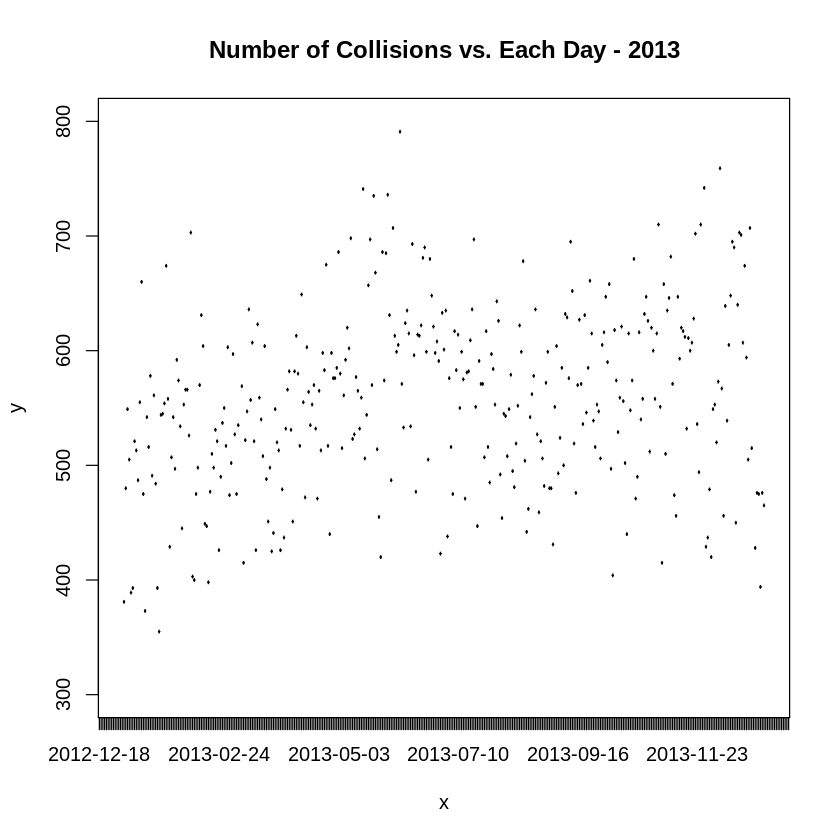

In [178]:
plot(ccd$collision_date[185:549], ccd$NUM_COLLISIONS[185:549], main="Number of Collisions vs. Each Day - 2013", xlim=c(185, 549), ylim=c(300,800))

**2.4.3.2 Eastablish Linear Relationship  - Day of the Week**

Now that we have established the data entries for days of the week in each year we can plot the number of collisions vs day of the week for the first 3 full years of data (i.e. 2013 to 2015) in order for us to establish which days of the week we can use for linear relationships:

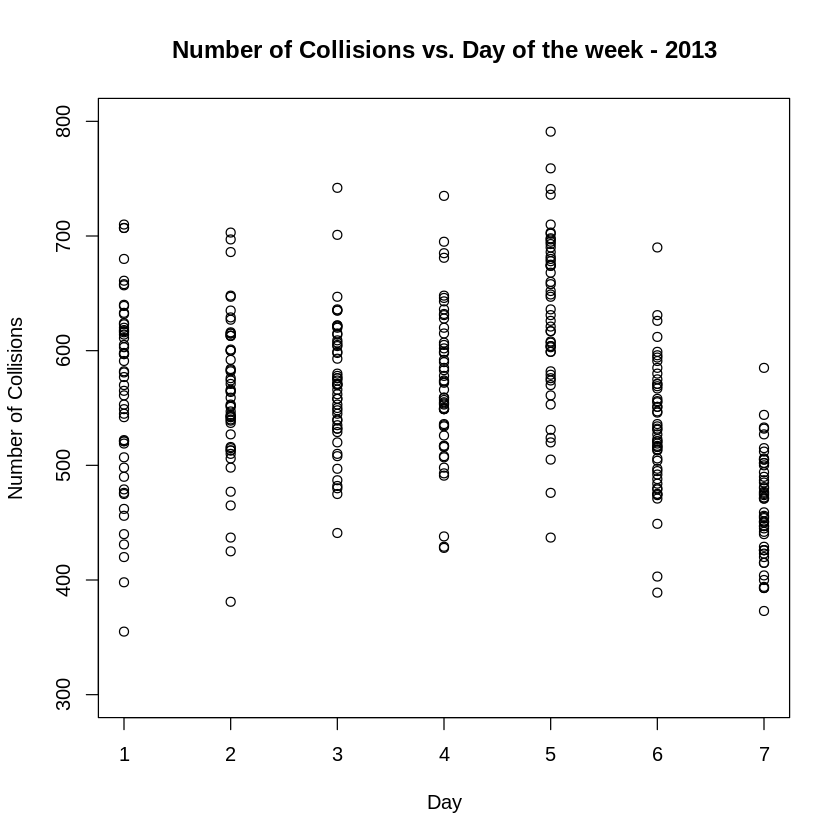

In [179]:
plot(ccd$day[185:549], ccd$NUM_COLLISIONS[185:549], main="Number of Collisions vs. Day of the week - 2013",
                                  xlab="Day",
                                  ylab="Number of Collisions", ylim=c(300,800))

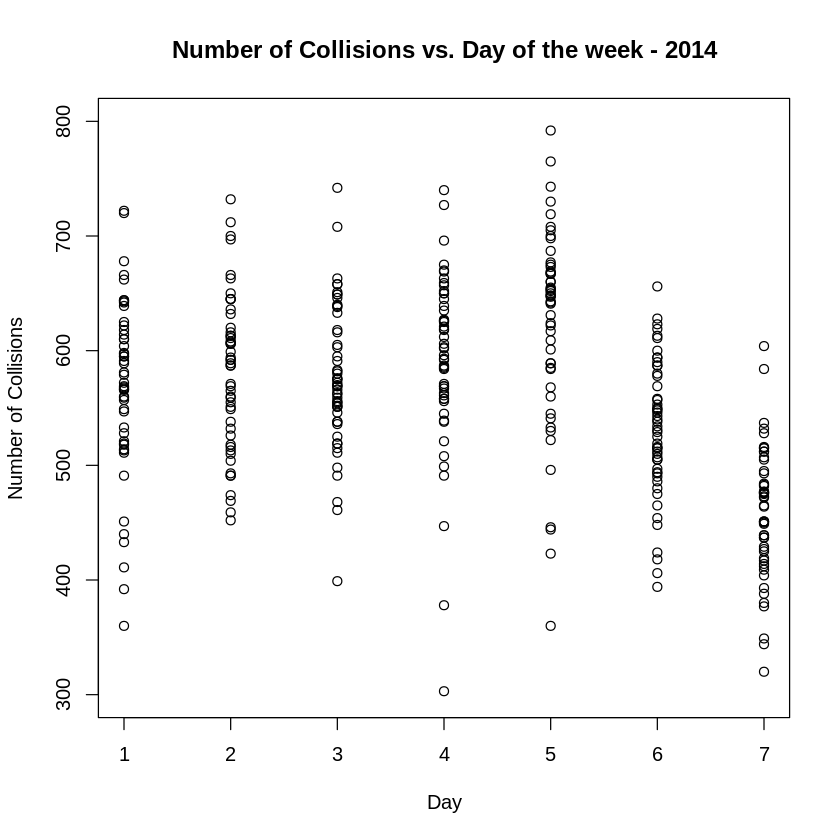

In [180]:
plot(ccd$day[550:914], ccd$NUM_COLLISIONS[550:914], main="Number of Collisions vs. Day of the week - 2014",
                                  xlab="Day",
                                  ylab="Number of Collisions", ylim=c(300,800))

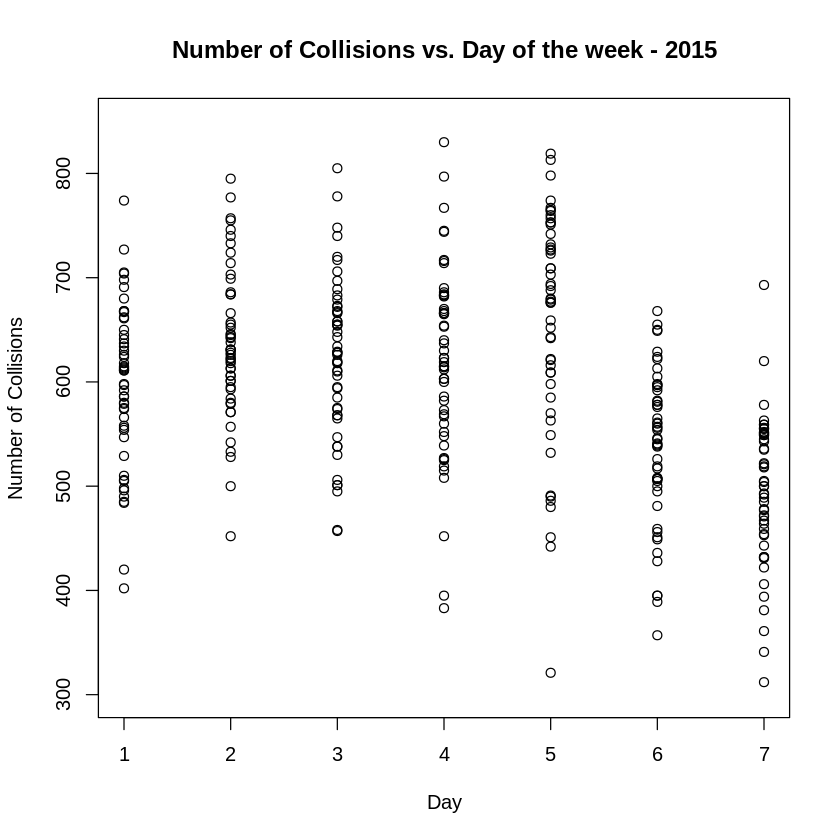

In [181]:
plot(ccd$day[915:1279], ccd$NUM_COLLISIONS[915:1279], main="Number of Collisions vs. Day of the week - 2015",
                                  xlab="Day",
                                  ylab="Number of Collisions", ylim=c(300,850))

# **3. Results**

### **3.1 Weather Correlations**

Selecting variables for regression models should be based on their predictive power, relevance to the research question, and practical considerations. Given the correlations we calculates earlier and the aim to predict the number of collisions based on the day of the week, here are five variables we will use, along with justifications for each:

**fog (Negative Correlation: -0.29512801):**

**Justification:** Fog directly affects visibility, which is a crucial factor in driving safety. The strong negative correlation suggests that fog presence is a significant predictor of collisions, possibly because it leads to more cautious driving or fewer people on the road. This variable can capture the inverse relationship between visibility conditions and the number of collisions.

**visib (Negative Correlation: -0.07536722):**

**Justification:** Visibility is a critical component of weather that influences driving conditions. It is plausible that lower visibility leads to higher collision rates, and this variable could help the model adjust predictions based on visibility levels.

**temp (Positive Correlation: 0.06798759):**

**Justification:** Temperature can influence road conditions (e.g., icy roads in colder temperatures, overheated engines or tire blowouts in hotter temperatures). It is a central aspect of weather that can affect driver behavior and vehicle performance.

**prcp (Positive Correlation: 0.01211670):**

**Justification:** Precipitation can make roads slippery and reduce visibility, increasing the likelihood of collisions. Although the correlation is not as strong as other variables, it is a primary weather condition with clear implications for road safety.

**day (Negative Correlation: -0.13314682):**

**Justification:** Since the goal is to predict the number of collisions on different days of the week, the day variable is inherently relevant. The negative correlation may reflect weekly patterns in traffic flow or driving behavior that are important to understand and model.

These selections are based on the correlations provided and domain knowledge that suggests these weather conditions have important effects on driving safety. The chosen variables include both weather conditions and temporal factors that can affect collision rates.

These variables provide a mix of direct weather conditions (like temp and prcp) and visibility factors (fog and visib), as well as the temporal factor (day) that's directly related to the prediction target. Negative correlations are included because they indicate an inverse relationship which is just as important for prediction as a positive relationship. Each variable chosen is expected to provide unique and valuable information for predicting the number of collisions.

### **3.2 Day of the Week Linear Relationship**

We can see from the last section (where we analysed collisions vs day of the week from 2013 - 2015) that Sunday has the lowest amount of collisions and Saturday the second lowest. From these results we will now re-order Sunday as day 1 and Saturday as day 2, day of the week would have a good linear relationship with number of trips.

The first few lines of the weather and collisions combined 'ccd' dataset can be seen below which shows the 'day' column that we will re-order in the next steps:



In [182]:
head(ccd)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,NA,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,NA,88.0,66.9,0.00,NA,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,NA,88.0,63.0,0.00,NA,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,NA,91.0,68.0,0.06,NA,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,NA,93.9,70.0,99.99,NA,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,NA,91.0,66.9,0.00,NA,0,638


**3.2.1 The following steps will reorder the days:**

Sunday == 1 & Saturday == 2

So we add 2 to each day number as follows:

In [183]:
ccd$day <- ccd$day+2

We then have to rename Saturday day number from 8 to 2:

In [184]:
ccd$day[ccd$day == 8] <- 2

Finally we rename Sunday day number from 9 to 1:

In [185]:
ccd$day[ccd$day == 9] <- 1

**3.2.2 Re-Ordered Day of the Week Dataset**

As we can see day the week has now been reordered in the dataset:

In [186]:
head(ccd)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,NA,0,538
2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,NA,88.0,66.9,0.00,NA,0,564
3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,NA,88.0,63.0,0.00,NA,0,664
4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,NA,91.0,68.0,0.06,NA,0,432
5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,NA,93.9,70.0,99.99,NA,0,591
6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,NA,91.0,66.9,0.00,NA,0,638


We can now visualise days of the week against number of collisions with Sunday at the beginning and Saturday second:

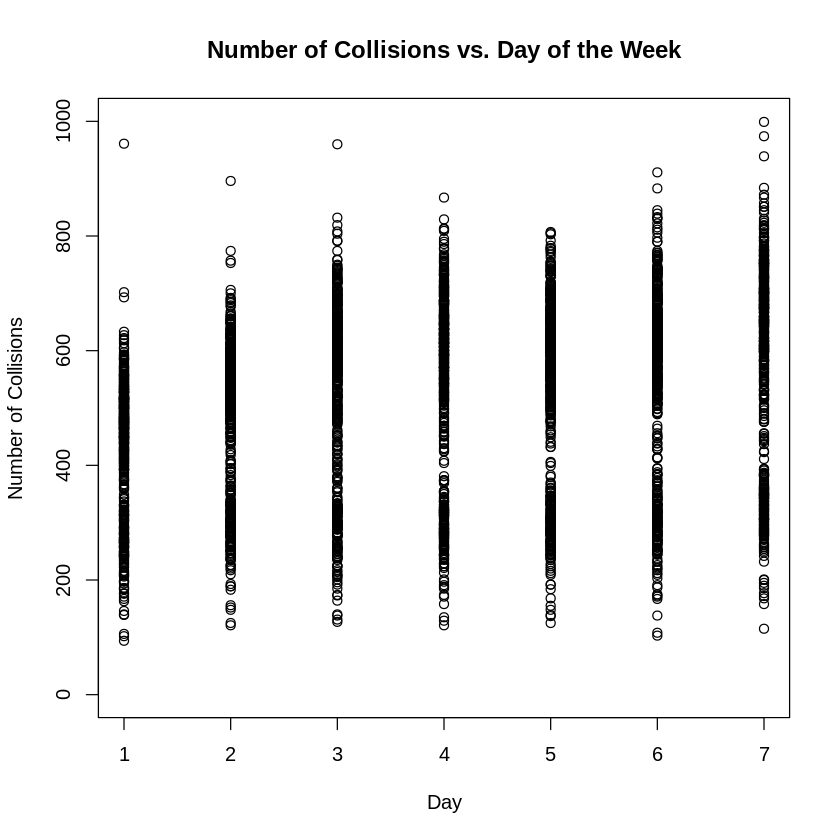

In [187]:
plot(ccd$day, ccd$NUM_COLLISIONS, main="Number of Collisions vs. Day of the Week", xlab="Day",
ylab="Number of Collisions", xlim=c(1,7), ylim=c(0,1000))

**3.2.3 Improved Correlation Result - Day vs Collisions**

We can see from re-ordering the days we have a stronger linear relationship with a correlation of 0.246316761514865.

In [188]:
cor(ccd$day, ccd$NUM_COLLISIONS)

[1] 0.2463168

### **3.3 Remove Outliers**

With Sunday day number 1, and Saturday day number 2 there is now a better linear relationship. We can now remove all the outliers so that we have more accurate data for number of collisions on each day.

Let's split up the data by year and add a dayindex:

In [189]:
ccdsplitcheck <- ccd

ccdsc2013 <- ccdsplitcheck[which(ccdsplitcheck$year == 2013), ]
dayofyear <- 1*seq_len(nrow(ccdsc2013))
dayindex <- 1*seq_len(nrow(ccdsc2013))
ccdsc2013a <- cbind(dayindex, dayofyear, ccdsc2013)

ccdsc2014 <- ccdsplitcheck[which(ccdsplitcheck$year == 2014), ]
dayofyear <- 1*seq_len(nrow(ccdsc2014))
dayindex <- 1*seq_len(nrow(ccdsc2014)) + 365
ccdsc2014a <- cbind(dayindex, dayofyear, ccdsc2014)

ccdsc2015 <- ccdsplitcheck[which(ccdsplitcheck$year == 2015), ]
dayofyear <- 1*seq_len(nrow(ccdsc2015))
dayindex <- 1*seq_len(nrow(ccdsc2015)) + 730
ccdsc2015a <- cbind(dayindex, dayofyear, ccdsc2015)

ccdsc2016 <- ccdsplitcheck[which(ccdsplitcheck$year == 2016), ]
dayofyear <- 1*seq_len(nrow(ccdsc2016))
dayindex <- 1*seq_len(nrow(ccdsc2016)) + 1096
ccdsc2016a <- cbind(dayindex, dayofyear, ccdsc2016)

ccdsc2017 <- ccdsplitcheck[which(ccdsplitcheck$year == 2017), ]
dayofyear <- 1*seq_len(nrow(ccdsc2017))
dayindex <- 1*seq_len(nrow(ccdsc2017)) + 1461
ccdsc2017a <- cbind(dayindex, dayofyear, ccdsc2017)

ccdsc2018 <- ccdsplitcheck[which(ccdsplitcheck$year == 2018), ]
dayofyear <- 1*seq_len(nrow(ccdsc2018))
dayindex <- 1*seq_len(nrow(ccdsc2018)) + 1826
ccdsc2018a <- cbind(dayindex, dayofyear, ccdsc2018)

ccdsc2019 <- ccdsplitcheck[which(ccdsplitcheck$year == 2019), ]
dayofyear <- 1*seq_len(nrow(ccdsc2019))
dayindex <- 1*seq_len(nrow(ccdsc2019)) + 2191
ccdsc2019a <- cbind(dayindex, dayofyear, ccdsc2019)

ccdsc2020 <- ccdsplitcheck[which(ccdsplitcheck$year == 2020), ]
dayofyear <- 1*seq_len(nrow(ccdsc2020))
dayindex <- 1*seq_len(nrow(ccdsc2020)) + 2557
ccdsc2020a <- cbind(dayindex, dayofyear, ccdsc2020)

ccdsc2021 <- ccdsplitcheck[which(ccdsplitcheck$year == 2021), ]
dayofyear <- 1*seq_len(nrow(ccdsc2021))
dayindex <- 1*seq_len(nrow(ccdsc2021)) + 2922
ccdsc2021a <- cbind(dayindex, dayofyear, ccdsc2021)





**3.3.1 Visualise Number of Collisions per Year**

Let's have a look at the number of collisions on each day of the year for all 7 years on top of each other.

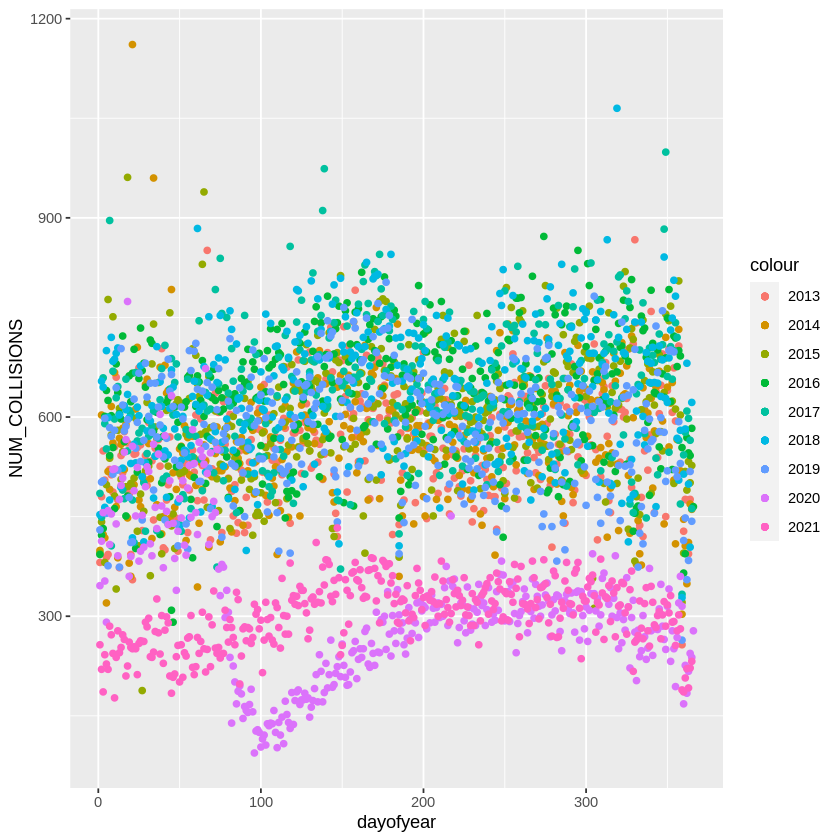

In [190]:
library(ggplot2)
ggplot() +
  geom_point(data=ccdsc2013a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ccdsc2014a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ccdsc2015a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ccdsc2016a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ccdsc2017a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ccdsc2018a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ccdsc2019a, aes(dayofyear, NUM_COLLISIONS, color="2019")) +
  geom_point(data=ccdsc2020a, aes(dayofyear, NUM_COLLISIONS, color="2020")) +
  geom_point(data=ccdsc2021a, aes(dayofyear, NUM_COLLISIONS, color="2021"))

**3.3.2 Remove COVID Years Data**

It is clear that there is a yearly pattern and there is a general yearly increase until 2020 when COVID lockdowns were enforced, so years 2020 and 2021 are stting outside the other data in a separate graph within the graph.

For the purposes of this assignment report and for using the data to later in assignment 2 for the regression models analysis we will use data from 2013 to 2019 only.

2012 and 2022 data is incomplete and projecting forwards for predictions using the linear and DNN models 2013 to 2019 data is more reliable.

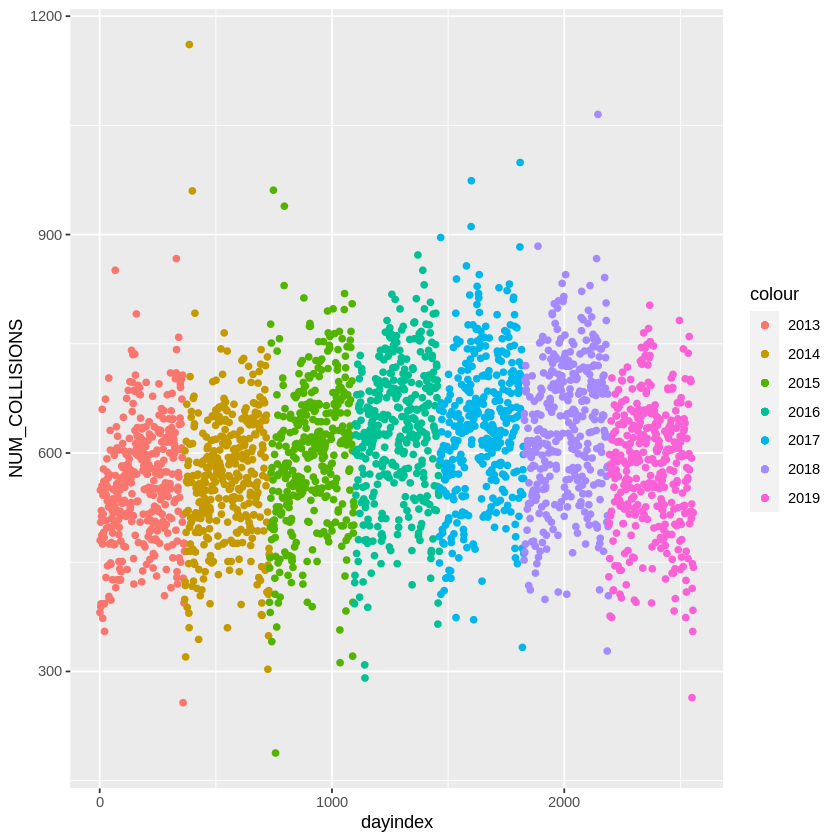

In [191]:
ggplot() +
  geom_point(data=ccdsc2013a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ccdsc2014a, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ccdsc2015a, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ccdsc2016a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ccdsc2017a, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ccdsc2018a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ccdsc2019a, aes(dayindex, NUM_COLLISIONS, color="2019"))

**3.3.3 Remove Remaining Outliers**

We can now see the seasonal pattern and the slight increase in collisions each year.

Let's remove outliers below 300 and above 850.

In [192]:
ccdsc2013b <- ccdsc2013a[which(ccdsc2013a$NUM_COLLISIONS >= 300), ]
ccdsc2014b <- ccdsc2014a[which(ccdsc2014a$NUM_COLLISIONS >= 300), ]
ccdsc2015b <- ccdsc2015a[which(ccdsc2015a$NUM_COLLISIONS >= 300), ]
ccdsc2016b <- ccdsc2016a[which(ccdsc2016a$NUM_COLLISIONS >= 300), ]
ccdsc2017b <- ccdsc2017a[which(ccdsc2017a$NUM_COLLISIONS >= 300), ]
ccdsc2018b <- ccdsc2018a[which(ccdsc2018a$NUM_COLLISIONS >= 300), ]
ccdsc2019b <- ccdsc2019a[which(ccdsc2019a$NUM_COLLISIONS >= 300), ]
ccdsc2013c <- ccdsc2013b[which(ccdsc2013b$NUM_COLLISIONS <= 850), ]
ccdsc2014c <- ccdsc2014b[which(ccdsc2014b$NUM_COLLISIONS <= 850), ]
ccdsc2015c <- ccdsc2015b[which(ccdsc2015b$NUM_COLLISIONS <= 850), ]
ccdsc2016c <- ccdsc2016b[which(ccdsc2016b$NUM_COLLISIONS <= 850), ]
ccdsc2017c <- ccdsc2017b[which(ccdsc2017b$NUM_COLLISIONS <= 850), ]
ccdsc2018c <- ccdsc2018b[which(ccdsc2018b$NUM_COLLISIONS <= 850), ]
ccdsc2019c <- ccdsc2019b[which(ccdsc2019b$NUM_COLLISIONS <= 850), ]


### **3.4 Visualise Collisions Data**

Let's now visualise for Day of the Year vs Collisions and then Day Index vs Collisions

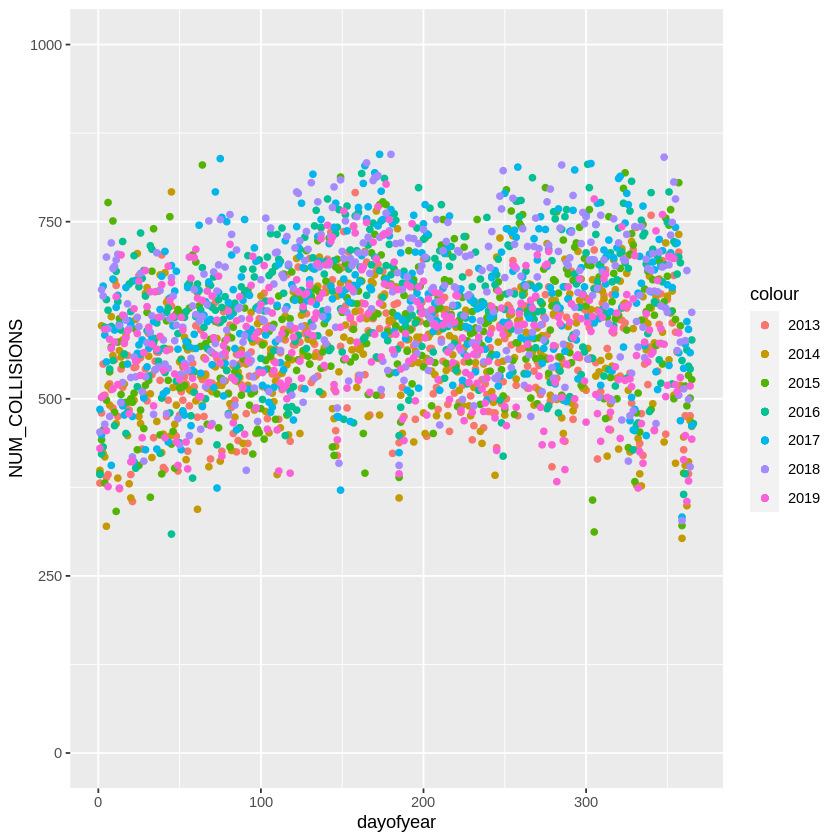

In [193]:
sp <- ggplot() +
  geom_point(data=ccdsc2013c, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ccdsc2014c, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ccdsc2015c, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ccdsc2016c, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ccdsc2017c, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ccdsc2018c, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ccdsc2019c, aes(dayofyear, NUM_COLLISIONS, color="2019"))

sp+ylim(0, 1000)

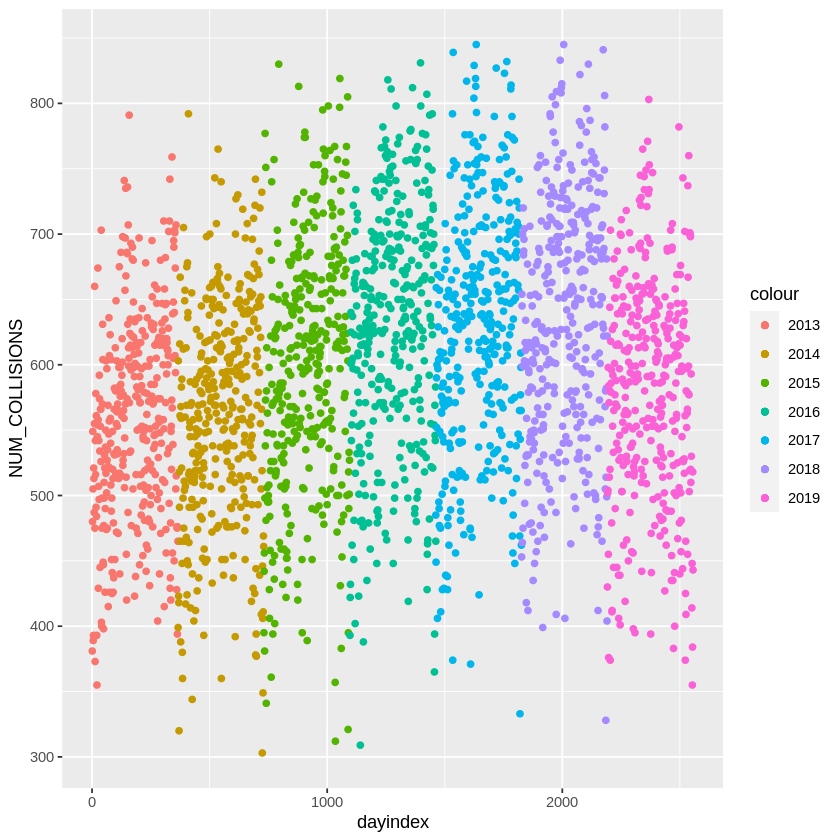

In [194]:
ggplot() +
  geom_point(data=ccdsc2013c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ccdsc2014c, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ccdsc2015c, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ccdsc2016c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ccdsc2017c, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ccdsc2018c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ccdsc2019c, aes(dayindex, NUM_COLLISIONS, color="2019"))

### **3.5 Revisit Day of the Week vs Collisions Correlations**

**3.5.1 Visualise**

now that we have performed some data manipulation we will revisit Days of the Week vs Collisions correlations. The following plot shows the total number collsions on each day of the week in 2013:


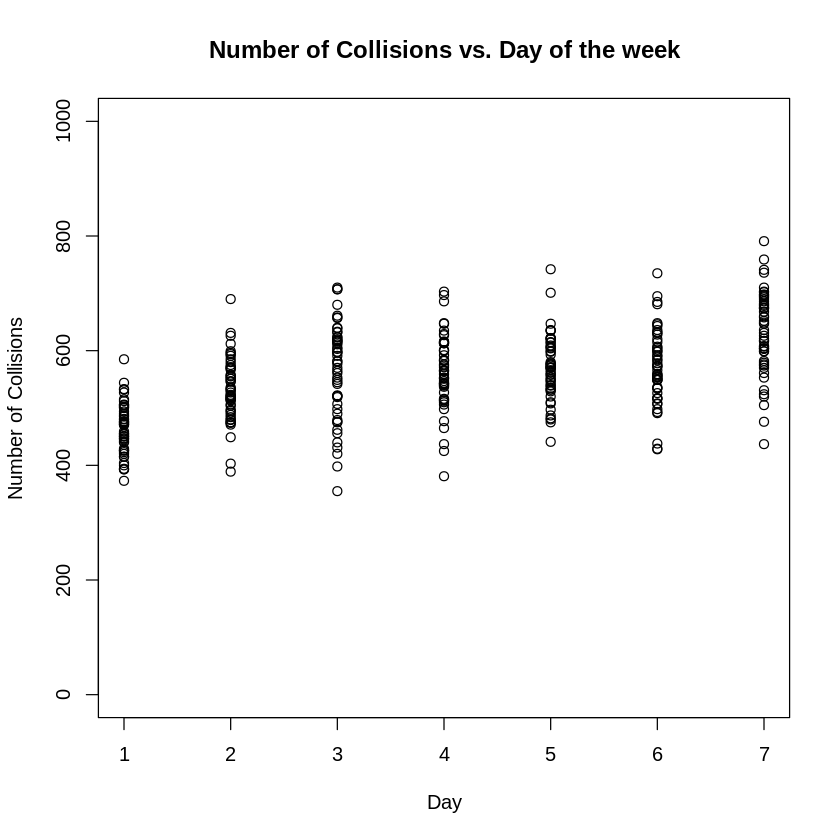

In [195]:
plot(ccdsc2013c$day, ccdsc2013c$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week", xlab="Day",
ylab="Number of Collisions", ylim=c(0,1000))

**3.5.2 Correlation Results**

In [196]:
cor(ccdsc2013c$day, ccdsc2013c$NUM_COLLISIONS)

[1] 0.5315215

There is a now a stronger correlation with Sunday at the start (day 1) amd Saturday second(day 2).

Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship.

Values between 0.3 and 0.7 (0.3 and −0.7) indicate a moderate positive (negative) linear relationship.

We will now look at days vs collisions correlations for each of the other years:

In [197]:
# 2014 day vs collisions correlation
cor(ccdsc2014c$day, ccdsc2014c$NUM_COLLISIONS)

[1] 0.5228186

In [198]:
# 2015 day vs collisions correlation
cor(ccdsc2015c$day, ccdsc2015c$NUM_COLLISIONS)

[1] 0.4908633

In [199]:
# 2016 day vs collisions correlation
cor(ccdsc2016c$day, ccdsc2016c$NUM_COLLISIONS)

[1] 0.5788656

In [200]:
# 2017 day vs collisions correlation
cor(ccdsc2017c$day, ccdsc2017c$NUM_COLLISIONS)

[1] 0.5416503

In [201]:
# 2018 day vs collisions correlation
cor(ccdsc2018c$day, ccdsc2018c$NUM_COLLISIONS)

[1] 0.5767431

In [202]:
# 2019 day vs collisions correlation
cor(ccdsc2019c$day, ccdsc2019c$NUM_COLLISIONS)

[1] 0.549909

2016 gives the best linear relationship at a correlation of 0.576743 with Sunday day 1 and Saturday day 2.

We can now look at all the data together using a splitcheck of all years combined:

In [203]:
ccdsplitcheckcombined <- rbind(ccdsc2013c, ccdsc2014c, ccdsc2015c, ccdsc2016c, ccdsc2017c, ccdsc2018c, ccdsc2019c)

ccdsplitcheckcombined

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,1,1,4,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.00,NA,0,381
186,2,2,5,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.00,NA,0,480
187,3,3,6,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.00,NA,0,549
188,4,4,7,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.00,NA,0,505
189,5,5,2,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.00,NA,0,389
190,6,6,1,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0.00,NA,0,393
191,7,7,3,2013,1,7,2013-01-07,40.9,23.8,1022.6,10.0,5.7,11.1,17.1,45.0,37.0,0.00,NA,0,521
192,8,8,4,2013,1,8,2013-01-08,40.7,25.4,1028.5,9.3,5.1,8.9,22.0,48.0,35.1,0.00,NA,0,513
193,9,9,5,2013,1,9,2013-01-09,43.8,30.8,1026.3,7.8,3.7,9.9,15.9,48.9,39.0,0.00,NA,0,487


### **3.6 Revisit Weather Variables Correlations**

Now that we have re-ordered the days to create a strong linear relationship with collisions we can now look at the combined years for day of the week vs collsions, followed by other weather variables correlations with collisions, This will help us decide on which variables to use in the linear and DNN regression models which will predict the day of the week when most collisions occur.

**3.6.1 Splitcheck Analysis**

We will plot the splitcheck analysis for 'Number of Collisions vs. Day of the week' combining all the relevant years then the new weather variable correlations vs collisions:

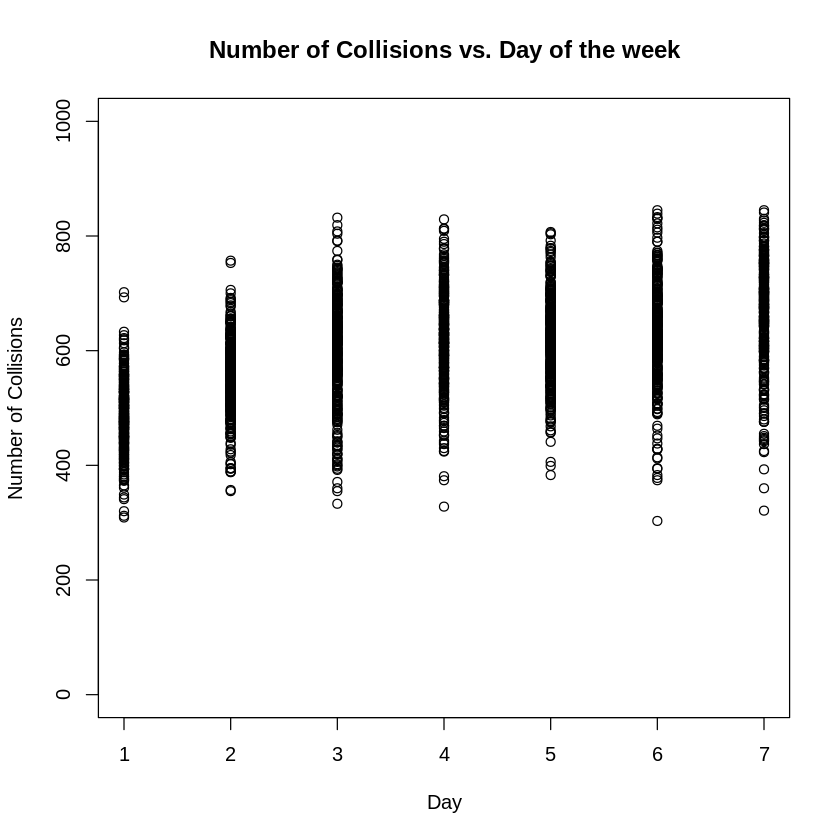

In [204]:
plot(ccdsplitcheckcombined$day, ccdsplitcheckcombined$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week", xlab="Day",
ylab="Number of Collisions", ylim=c(0,1000))

In [205]:
cor(ccdsplitcheckcombined$day, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] 0.512187

In [206]:
cor(ccdsplitcheckcombined$temp, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2347851

In [207]:
cor(ccdsplitcheckcombined$dewp, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2209731

In [208]:
cor(ccdsplitcheckcombined$sndp, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] NA

In [209]:
cor(ccdsplitcheckcombined$prcp, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] 0.06761835

In [210]:
cor(ccdsplitcheckcombined$fog, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] 0.03703372

In [211]:
cor(ccdsplitcheckcombined$wdsp, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] NA

In [212]:
cor(ccdsplitcheckcombined$mxpsd, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] NA

In [213]:
cor(ccdsplitcheckcombined$visib, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] NA

In [214]:
cor(ccdsplitcheckcombined$slp, ccdsplitcheckcombined$NUM_COLLISIONS)

[1] NA

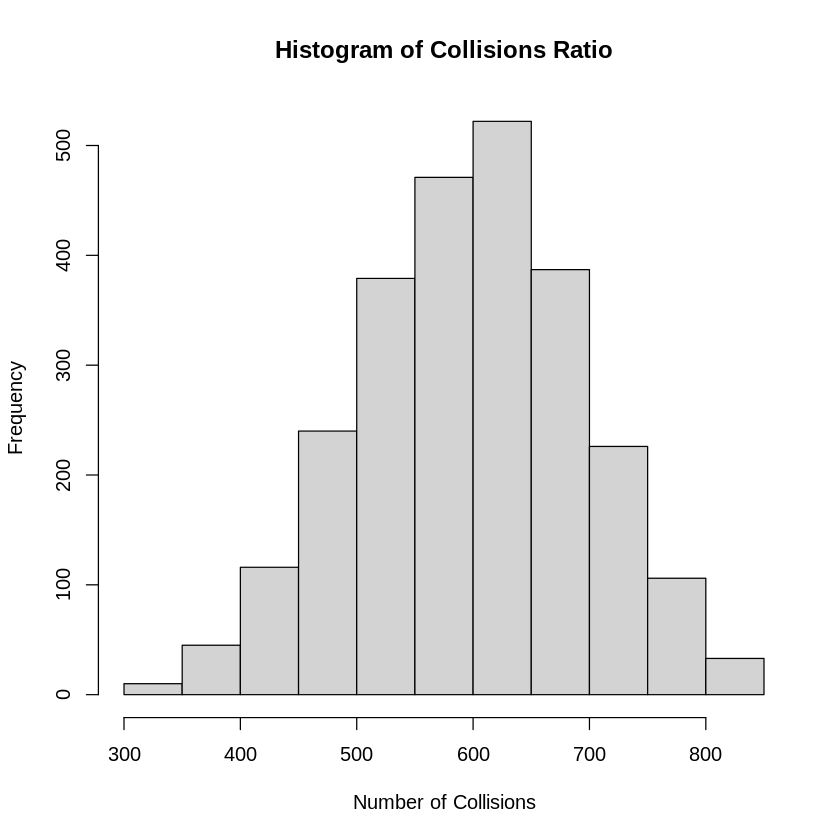

In [215]:
hist(ccdsplitcheckcombined$NUM_COLLISIONS, breaks =8, main="Histogram of Collisions Ratio", xlab="Number of Collisions",
ylab="Frequency")

**3.6.2 Predictor Variable Analysis**

As we can see from the histogram we now have a normal distribution for Number of Collisions.

We will use day of the week, temperature, dewpoint and precipitation variables for the linear regressor based on the correlations.

We also obviously need number of collisions for the linear regressor.

In [216]:
head(ccdsplitcheckcombined)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,1,1,4,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0,NA,0,381
186,2,2,5,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0,NA,0,480
187,3,3,6,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0,NA,0,549
188,4,4,7,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0,NA,0,505
189,5,5,2,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0,NA,0,389
190,6,6,1,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0,NA,0,393


### **4. Create Linear Regression Datasets**

We will now select the data we will use for the linear regression part of assignment 2 by column number.

We will create 3 linear regression datasets: linearregressiondata1, linearregressiondata2 and linearregressiondata3 which will have different variables so that we can then select the best model for predictions.

linearregressiondata1 - has columns 'day' and 'NUM_COLLISIONS'

linearregressiondata2 - has columns 'day', 'temp' and 'NUM_COLLISIONS'

linearregressiondata3 - has columns 'day', 'temp', 'dewp' and 'NUM_COLLISIONS'

linearregressiondata4 - has columns 'day', 'temp', 'dewp', 'prcp' and 'NUM_COLLISIONS'

We then use write.csv function to create and store the csv data set for each model that we will use later:

In [217]:
linearregressiondata1 <- ccdsplitcheckcombined[,c(3,20)]

head(linearregressiondata1)

linearregressiondata2 <- ccdsplitcheckcombined[,c(3,8,20)]

head(linearregressiondata2)

linearregressiondata3 <- ccdsplitcheckcombined[,c(3,8,9,20)]

head(linearregressiondata3)

linearregressiondata4 <- ccdsplitcheckcombined[,c(3,8,9,17,20)]

head(linearregressiondata4)

,day,NUM_COLLISIONS
,<dbl>,<int>
185,4,381
186,5,480
187,6,549
188,7,505
189,2,389
190,1,393


,day,temp,NUM_COLLISIONS
,<dbl>,<dbl>,<int>
185,4,37.8,381
186,5,27.1,480
187,6,28.4,549
188,7,33.4,505
189,2,36.1,389
190,1,38.3,393


,day,temp,dewp,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<int>
185,4,37.8,23.6,381
186,5,27.1,10.5,480
187,6,28.4,14.1,549
188,7,33.4,18.6,505
189,2,36.1,18.7,389
190,1,38.3,25.0,393


,day,temp,dewp,prcp,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
185,4,37.8,23.6,0,381
186,5,27.1,10.5,0,480
187,6,28.4,14.1,0,549
188,7,33.4,18.6,0,505
189,2,36.1,18.7,0,389
190,1,38.3,25.0,0,393


In [218]:
write.csv(linearregressiondata1, file="/content/assignment1lineardata1.csv")

write.csv(linearregressiondata2, file="/content/assignment1lineardata2.csv")

write.csv(linearregressiondata3, file="/content/assignment1lineardata3.csv")

write.csv(linearregressiondata4, file="/content/assignment1lineardata4.csv")

### **5. Prepare and Create DNN Regression Data**

When it comes to the Deep Learning Neural Network regression, we also use Month and Year. When we use month as categorical data i.e. Jan, Feb, Mar etc. we can use one hot encoding. We can use a similar approach for day of the week too for the DNN method.

There are two common approaches for encoding categorical data: 'ordinal encoding' and 'one hot encoding'. For months we use ordinal.

A potential drawback of ordinal encoding is that it implicitly assumes an order across the categories. For example, February (which is encoded with a value of 2) seems to be more than January (which is encoded with a value of 1), even though this is in fact not a meaningful way of comparing those values. This is not necessarily a problem, but it is a reason to be cautious in terms of how the encoded data is used.

The reason for this, is because of the seasonality issue. We can assume that year on year there is a marginal increase, but that there is a pattern every year. By using month we will hopefully allow the kind of reduction in variability we found earlier on, where we took a subset from 2013, 2014 and 2015.

Now for the DNN we will create a few more datasets to use in the DNN regression analysis:

dnnregressiondata1 <- [month, year, dayofweek, temp, prcp, dewp, NUM_COLLISIONS],

dnnregressiondata2 <- [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, year, dayofweek, temp, prcp, dewp, NUM_COLLISIONS]

dnnregressiondata3 <- [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec, year, sun, mon, tue, wed, thu, fri, sat, temp, prcp, dewp, NUM_COLLISIONS].

We can then do some testing between each model that is trained with different data.

This is not an exhaustive list but we will be able to construct data to validate the results.

We will take a couple of examples from the data e.g. pick columns 3 or 5, remove them from the data used to train/test and keep it to check how well your model runs.

Let's try some one-hot encoding with our categorical month data.

Firstly, we will need to do change months to text i.e. 1 to Jan, 2 to Feb, 3 to March etc.

In [219]:
ccdsplitcheckcombined2 <- ccdsplitcheckcombined

In [220]:
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 1] <- 'Jan'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 2] <- 'Feb'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 3] <- 'Mar'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 4] <- 'Apr'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 5] <- 'May'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 6] <- 'Jun'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 7] <- 'Jul'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 8] <- 'Aug'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 9] <- 'Sep'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 10] <- 'Oct'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 11] <- 'Nov'
ccdsplitcheckcombined2$mo[ccdsplitcheckcombined2$mo == 12] <- 'Dec'

Next, we will do the same for 'day':

In [221]:
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 1] <- 'Sun'
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 2] <- 'Sat'
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 3] <- 'Mon'
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 4] <- 'Tue'
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 5] <- 'Wed'
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 6] <- 'Thu'
ccdsplitcheckcombined2$day[ccdsplitcheckcombined2$day == 7] <- 'Fri'

We can now check the first few lines of the new dataset:

In [222]:
head(ccdsplitcheckcombined2)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,1,1,Tue,2013,Jan,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0,NA,0,381
186,2,2,Wed,2013,Jan,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0,NA,0,480
187,3,3,Thu,2013,Jan,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0,NA,0,549
188,4,4,Fri,2013,Jan,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0,NA,0,505
189,5,5,Sat,2013,Jan,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0,NA,0,389
190,6,6,Sun,2013,Jan,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0,NA,0,393


Now, we need to apply one-hot encoding on both Month and day of the week.

Firstly for Month (mo):

In [223]:
months <- model.matrix(~0+ccdsplitcheckcombined2$mo)
head(months)

,ccdsplitcheckcombined2$moApr,ccdsplitcheckcombined2$moAug,ccdsplitcheckcombined2$moDec,ccdsplitcheckcombined2$moFeb,ccdsplitcheckcombined2$moJan,ccdsplitcheckcombined2$moJul,ccdsplitcheckcombined2$moJun,ccdsplitcheckcombined2$moMar,ccdsplitcheckcombined2$moMay,ccdsplitcheckcombined2$moNov,ccdsplitcheckcombined2$moOct,ccdsplitcheckcombined2$moSep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [224]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [225]:
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


Secondly for daysofweek (day):

In [226]:
daysofweek <- model.matrix(~0+ccdsplitcheckcombined2$day)
head(daysofweek)

,ccdsplitcheckcombined2$dayFri,ccdsplitcheckcombined2$dayMon,ccdsplitcheckcombined2$daySat,ccdsplitcheckcombined2$daySun,ccdsplitcheckcombined2$dayThu,ccdsplitcheckcombined2$dayTue,ccdsplitcheckcombined2$dayWed
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0


In [227]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")
head(daysofweek)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0


In [228]:
# dnnregressiondata1 <- [month, year, dayofweek, temp, prcp, dewp, NUM_COLLISIONS]
dnnregressiondata1 <- data.frame(months, daysofweek, ccdsplitcheckcombined2$year, ccdsplitcheckcombined2$mo, ccdsplitcheckcombined2$temp, ccdsplitcheckcombined2$NUM_COLLISIONS)

In [229]:
# change names of other column names
colnames(dnnregressiondata1)[which(names(dnnregressiondata1) == "ccdsplitcheckcombined2.year")] <- "year"
colnames(dnnregressiondata1)[which(names(dnnregressiondata1) == "ccdsplitcheckcombined2.mo")] <- "month"
colnames(dnnregressiondata1)[which(names(dnnregressiondata1) == "ccdsplitcheckcombined2.temp")] <- "temp"
colnames(dnnregressiondata1)[which(names(dnnregressiondata1) == "ccdsplitcheckcombined2.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [230]:
summary(dnnregressiondata1)

      Apr               Aug              Dec               Feb         
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.08245   Mean   :0.0856   Mean   :0.08402   Mean   :0.07692  
 3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul              Jun               Mar         
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.08402   Mean   :0.0856   Mean   :0.08284   Mean   :0.08442  
 3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.00000   Max.   :1.

In [231]:
head(dnnregressiondata1)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Mon,Sat,Sun,Thu,Tue,Wed,year,month,temp,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<int>
1,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,2013,Jan,37.8,381
2,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,1,2013,Jan,27.1,480
3,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,2013,Jan,28.4,549
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,2013,Jan,33.4,505
5,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,2013,Jan,36.1,389
6,0,0,0,0,1,0,0,0,0,0,⋯,0,0,1,0,0,0,2013,Jan,38.3,393


In [232]:
dnnregressiondata2 <- data.frame(months, daysofweek, ccdsplitcheckcombined2$year, ccdsplitcheckcombined2$mo, ccdsplitcheckcombined2$temp, ccdsplitcheckcombined2$NUM_COLLISIONS)

I have added one hot encoding for months, day of the week and added them to other data including, year, temp, windspeed and number of trips. Obviously, I should add more like visibility, fog, prcp etc. and test those, but just to keep things simple for this example I have tried to keep the number of columns down for this example, especially after one hot encoding has increased the number of columns.

In [233]:
 write.csv(dnnregressiondata1,"/content/dnnregressiondata1.csv", row.names = FALSE)

 write.csv(dnnregressiondata2,"/content/dnnregressiondata2.csv", row.names = FALSE)

 write.csv(dnnregressiondata2,"/content/dnnregressiondata2.csv", row.names = FALSE)

 write.csv(dnnregressiondata2,"/content/dnnregressiondata2.csv", row.names = FALSE)



# **6. Conclusion**